<div style="background: linear-gradient(135deg,#0ea5e9,#a78bfa); padding:18px 20px; border-radius:16px; color:white; box-shadow:0 8px 20px rgba(0,0,0,0.15); font-family:system-ui,-apple-system,Segoe UI,Roboto,Ubuntu,Helvetica,Arial,sans-serif;">

  <div style="display:flex; align-items:center; gap:12px; margin-bottom:10px;">
    <span style="font-size:28px;">📈🔍</span>
    <h1 style="margin:0; font-size:22px; letter-spacing:0.3px;">Assignment 6 – Imputation via Regression for Missing Data</h1>
  </div>

  <div style="display:flex; flex-wrap:wrap; gap:10px; margin:8px 0 16px;">
    <span style="background:rgba(255,255,255,0.2); padding:6px 10px; border-radius:999px; font-weight:600;">DA5401 • Data Analytics Lab</span>
    <span style="background:#3b82f6; color:#ecfeff; padding:6px 10px; border-radius:999px; font-weight:700;">A6 — Imputation via Regression </span>
    <span style="background:#fef3c7; color:#7a4d00; padding:6px 10px; border-radius:999px; font-weight:700;">Dataset: UCI Credit Card Default</span>
  </div>

  <div style="background:rgba(255,255,255,0.9); color:#0f172a; padding:14px 16px; border-radius:12px; border-left:6px solid #0ea5e9; line-height:1.45;">
    <p style="margin:0;">
      <strong>Objective:</strong>
      Handle <em>Missing At Random (MAR)</em> values in the UCI Credit Card dataset using three different imputation approaches —
      <strong>Median (Baseline)</strong>, <strong>Linear Regression</strong>, and <strong>K-Nearest Neighbors Regression</strong> —
      and evaluate their impact on a classification model (Logistic Regression) for credit default prediction.
    </p>
  </div>

  <div style="display:grid; grid-template-columns: 1fr 1fr; gap:12px; margin-top:16px;">
    <div style="background:rgba(255,255,255,0.15); padding:12px 14px; border-radius:12px;">
      <div style="opacity:0.9; font-size:12px;">Course</div>
      <div style="font-weight:700;">DA5401 — DATA ANALYTICS LAB</div>
    </div>
    <div style="background:rgba(255,255,255,0.15); padding:12px 14px; border-radius:12px;">
      <div style="opacity:0.9; font-size:12px;">Assignment</div>
      <div style="font-weight:700;">A6 — Imputation via Regression for Missing Data</div>
    </div>
    <div style="background:rgba(255,255,255,0.15); padding:12px 14px; border-radius:12px;">
      <div style="opacity:0.9; font-size:12px;">Owner</div>
      <div style="font-weight:700;">JIGARAHEMAD K SHAIKH</div>
    </div>
    <div style="background:rgba(255,255,255,0.15); padding:12px 14px; border-radius:12px;">
      <div style="opacity:0.9; font-size:12px;">Roll Number</div>
      <div style="font-weight:700;">DA25M014</div>
    </div>
  </div>

  <div style="margin-top:14px; font-size:12px; opacity:0.95;">
    ✨ All plots and color schemes are color-blind friendly.
  </div>
</div>


<div style="background: linear-gradient(120deg, #10b981, #3b82f6, #6366f1); padding:22px 26px; border-radius:18px; color:white; box-shadow:0 6px 20px rgba(0,0,0,0.15); font-family:system-ui, -apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif;">

  <h2 style="margin-top:0; font-size:26px; display:flex; align-items:center; gap:10px;">
    ⚙️ <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:4px;">Setup, Library Imports & Visualization Style</span>
  </h2>

  <p style="font-size:16px; line-height:1.6; background:rgba(255,255,255,0.15); padding:14px 18px; border-radius:10px;">
    This section imports all essential <strong>Python libraries</strong> for 
    <span style="color:#fcd34d;">data manipulation</span>, 
    <span style="color:#a7f3d0;">regression-based imputation</span>, and 
    <span style="color:#bae6fd;">visual analytics</span>.  
    It also applies a consistent, <strong>color-blind-friendly visualization style</strong> to ensure clarity and accessibility across all plots.
  </p>

  <div style="margin-top:10px; font-size:14px; opacity:0.9;">
    💡 <em>Custom palettes (inspired by Seaborn’s <code>colorblind</code> theme) and controlled warnings make the notebook cleaner and visually uniform.</em>
  </div>
</div>

In [71]:
# =========================================================
# ⚙️ Setup, Library Imports & Visualization Style
# =========================================================

# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats

# Machine Learning Libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, auc
)
from sklearn.exceptions import ConvergenceWarning

# Warning Control
import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# =========================================================
# 🎨 Visualization Style Configuration
# =========================================================
plt.style.use('seaborn-v0_8-whitegrid')

# Color-blind-friendly palette (high contrast, distinct hues)
color_blind_palette = ["#0072B2", "#D55E00", "#009E73", "#F0E442", "#56B4E9", "#E69F00"]
sns.set_palette(color_blind_palette)

# Set consistent random seed for reproducibility
np.random.seed(42)

print("✅ Libraries imported and visualization style configured.")

✅ Libraries imported and visualization style configured.


<div style="background: linear-gradient(120deg, #0ea5e9, #6366f1, #8b5cf6); padding:22px 26px; border-radius:18px; color:white; box-shadow:0 6px 20px rgba(0,0,0,0.15); font-family:system-ui, -apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif;">

  <h2 style="margin-top:0; font-size:26px; display:flex; align-items:center; gap:10px;">
    🧩 <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:4px;">Part A — Data Preprocessing and Imputation</span>
  </h2>

  <p style="font-size:16px; line-height:1.6; background:rgba(255,255,255,0.15); padding:14px 18px; border-radius:10px;">
    In this section, we perform essential <strong>data cleaning and preprocessing</strong> steps on the 
    <em>UCI Credit Card Default Clients Dataset</em>.  
    To simulate real-world data imperfections, <strong>Missing At Random (MAR)</strong> values are artificially introduced in selected numerical columns 
    (e.g., <code>AGE</code> , <code>BILL_AMT1</code> and <code>BILL_AMT2</code>).  
    These missing entries are then handled using three distinct imputation strategies:
  </p>

  <ul style="margin:10px 0 0 20px; font-size:15px; line-height:1.6;">
    <li><strong style="color:#fcd34d;">Median Imputation (A)</strong> — a robust baseline approach resistant to outliers.</li>
    <li><strong style="color:#a7f3d0;">Linear Regression Imputation (B)</strong> — predicts missing values using a linear relationship among features.</li>
    <li><strong style="color:#bae6fd;">KNN Regression Imputation (C)</strong> — captures non-linear dependencies using neighboring samples.</li>
  </ul>

  <div style="margin-top:14px; font-size:14px; opacity:0.9;">
    💡 <em>A fourth dataset (D) is also created by listwise deletion of rows containing any missing values for comparative evaluation.</em>
  </div>
</div>

<div style="background: linear-gradient(120deg, #06b6d4, #3b82f6, #8b5cf6); padding:22px 26px; border-radius:18px; color:white; box-shadow:0 6px 20px rgba(0,0,0,0.18); font-family:system-ui, -apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif;">

  <h3 style="margin-top:0; font-size:24px; display:flex; align-items:center; gap:10px;">
    📘 <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:3px;">Part A1 — Data Loading and Initial Exploration</span>
  </h3>

  <p style="font-size:16px; line-height:1.6; background:rgba(255,255,255,0.15); padding:14px 18px; border-radius:10px;">
    We begin by loading the <strong>UCI Credit Card Default Clients</strong> dataset into a 
    <code>pandas DataFrame</code> and verifying its structure.  
    This step ensures the dataset is read correctly and helps us understand its basic composition 
    — the number of features, data types, and the distribution of the target variable 
    <code>default.payment.next.month</code>.
  </p>

  <div style="margin-top:10px; font-size:14px; opacity:0.9;">
    💡 <em>Visualizing the target variable helps confirm class balance before proceeding to imputation and modeling.</em>
  </div>
</div>

✅ Data Loaded Successfully!
Shape: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0



🔍 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AM

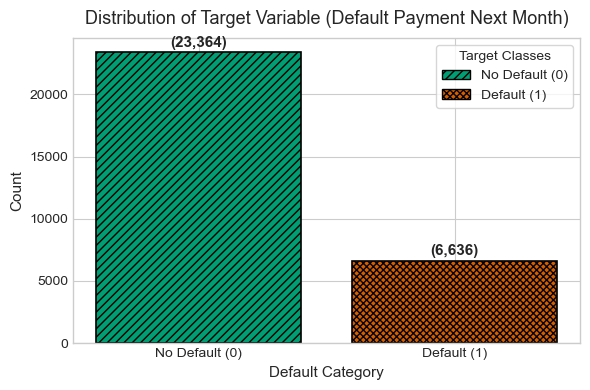

In [72]:
# Data Loading
data = pd.read_csv("UCI_Credit_Card.csv")
print("✅ Data Loaded Successfully!")

# Preview
print(f"Shape: {data.shape}")
display(data.head())

# Basic info
print("\n🔍 Dataset Information:")
data.info()


plt.figure(figsize=(6, 4))

# Compute counts for clarity
counts = data['default.payment.next.month'].value_counts().sort_index()
categories = ['No Default (0)', 'Default (1)']

# Define color-blind friendly colors and hatching patterns
colors = ["#009E73", "#D55E00"]        # green & orange (safe contrast)
hatches = ['////', 'xxxxx']

bars = plt.bar(
    categories,
    counts,
    color=colors,
    edgecolor='black',
    linewidth=1.2,
    hatch=None  
)

# Different hatch patterns to each bar
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

# Text labels on top of bars (formatted with commas)
for bar, count in zip(bars, counts):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + max(counts)*0.01,   # small offset
        f"({count:,.0f})",
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='600'
    )

# Legend mapping hatch to meaning
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=colors[0], edgecolor='black', hatch=hatches[0], label='No Default (0)'),
    Patch(facecolor=colors[1], edgecolor='black', hatch=hatches[1], label='Default (1)')
]
plt.legend(handles=legend_elements, title="Target Classes", loc='upper right', frameon=True)

# Titles and labels
plt.title("Distribution of Target Variable (Default Payment Next Month)", fontsize=13, pad=10)
plt.xlabel("Default Category", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.tight_layout()
plt.show()

<div style="background: linear-gradient(120deg, #06b6d4, #3b82f6, #8b5cf6); padding:22px 26px; border-radius:18px; color:white; box-shadow:0 6px 20px rgba(0,0,0,0.18); font-family:system-ui, -apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif;">

  <h3 style="margin-top:0; font-size:24px; display:flex; align-items:center; gap:10px;">
    🧩 <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:3px;">Part A1 — Artificially Introduce MAR (Missing At Random) Values</span>
  </h3>

  <p style="font-size:16px; line-height:1.6; background:rgba(255,255,255,0.15); padding:14px 18px; border-radius:10px;">
    In this step, we <strong>intentionally introduce controlled missingness</strong> to simulate a realistic 
    <strong>Missing At Random (MAR)</strong> pattern in the dataset.  
    Specifically, <strong>5%</strong> of the rows are randomly selected and made missing in the following columns:  
    <code>AGE</code>, <code>BILL_AMT1</code>, and <code>BILL_AMT2</code>.  
    This controlled removal helps us assess the robustness of different imputation methods under partially missing conditions.
  </p>

  <div style="margin-top:10px; font-size:14px; opacity:0.9;">
    💡 <em>Creating MAR data allows fair benchmarking of imputation strategies on realistic missing-data scenarios.</em>
  </div>
</div>

In [73]:
# Copy the dataset before modifying
df = data.copy()

# Columns where we'll introduce MAR missing values
mar_cols = ['AGE', 'BILL_AMT1', 'BILL_AMT2']

for col in mar_cols:
    # Randomly select 5% indices
    n_missing = int(0.05 * len(df))
    missing_indices = np.random.choice(df.index, n_missing, replace=False)
    df.loc[missing_indices, col] = np.nan

print("✅ Artificial Missing Values Introduced Successfully!")

# Check missing percentage
missing_percent = df[mar_cols].isnull().mean() * 100
print("\nPercentage of Missing Values:\n", missing_percent)


✅ Artificial Missing Values Introduced Successfully!

Percentage of Missing Values:
 AGE          5.0
BILL_AMT1    5.0
BILL_AMT2    5.0
dtype: float64


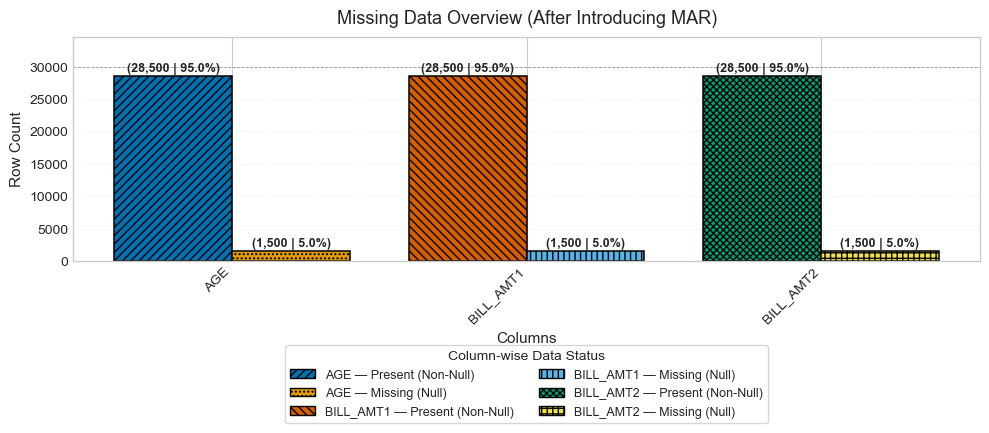

In [74]:
# =========================================================
# 📊 Missing Data Overview (After Introducing MAR)
# =========================================================

# Compute missing and present counts
missing_counts = df[mar_cols].isnull().sum()
total_rows = len(df)
present_counts = total_rows - missing_counts

x_pos = np.arange(len(mar_cols))
bar_width = 0.4

# Color-blind-friendly palette (6 colors)
color_blind_palette = ["#0072B2", "#D55E00", "#009E73", "#F0E442", "#56B4E9", "#E69F00"]

# 6 visually distinct hatch patterns
hatch_patterns = ['////', '\\\\\\\\', 'xxxxx', '....', '|||', '+++']

plt.figure(figsize=(10, 5))
bars_present, bars_missing = [], []

# Plot each column with unique color + hatch combination
for i, col in enumerate(mar_cols):
    color_present = color_blind_palette[i % len(color_blind_palette)]
    color_missing = color_blind_palette[::-1][i % len(color_blind_palette)]
    hatch_present = hatch_patterns[i % len(hatch_patterns)]
    hatch_missing = hatch_patterns[(i + 3) % len(hatch_patterns)]  # offset for visual contrast

    # Present bars
    bp = plt.bar(
        i - bar_width / 2, present_counts[col],
        width=bar_width, color=color_present,
        edgecolor='black', linewidth=1.1,
        hatch=hatch_present
    )

    # Missing bars
    bm = plt.bar(
        i + bar_width / 2, missing_counts[col],
        width=bar_width, color=color_missing,
        edgecolor='black', linewidth=1.1,
        hatch=hatch_missing
    )

    bars_present.append(bp)
    bars_missing.append(bm)

    # Add count + % labels on bars
    present_pct = (present_counts[col] / total_rows) * 100
    missing_pct = (missing_counts[col] / total_rows) * 100

    plt.text(
        i - bar_width / 2, present_counts[col] + total_rows * 0.01,
        f"({present_counts[col]:,} | {present_pct:.1f}%)",
        ha='center', va='bottom', fontsize=9, fontweight='600'
    )
    plt.text(
        i + bar_width / 2, missing_counts[col] + total_rows * 0.01,
        f"({missing_counts[col]:,} | {missing_pct:.1f}%)",
        ha='center', va='bottom', fontsize=9, fontweight='600'
    )

# Reference line
plt.axhline(y=total_rows, color='black', linestyle='--', linewidth=0.6, alpha=0.4)

# Axes styling
plt.xlabel('Columns', fontsize=11)
plt.ylabel('Row Count', fontsize=11)
plt.title('Missing Data Overview (After Introducing MAR)', fontsize=13, pad=10)
plt.xticks(x_pos, mar_cols, rotation=45, ha='right')
plt.ylim(0, total_rows * 1.15)
plt.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)


from matplotlib.patches import Patch

legend_elements = []
for i, col in enumerate(mar_cols):
    legend_elements.append(
        Patch(facecolor=color_blind_palette[i % len(color_blind_palette)],
              edgecolor='black', hatch=hatch_patterns[i % len(hatch_patterns)],
              label=f"{col} — Present (Non-Null)")
    )
    legend_elements.append(
        Patch(facecolor=color_blind_palette[::-1][i % len(color_blind_palette)],
              edgecolor='black', hatch=hatch_patterns[(i + 3) % len(hatch_patterns)],
              label=f"{col} — Missing (Null)")
    )

plt.legend(
    handles=legend_elements,
    title="Column-wise Data Status",
    loc='upper center',
    bbox_to_anchor=(0.5, -0.35),   # 👈 shifted slightly lower
    ncol=2,
    frameon=True,
    fontsize=9,
    title_fontsize=10
)

plt.tight_layout()
plt.show()

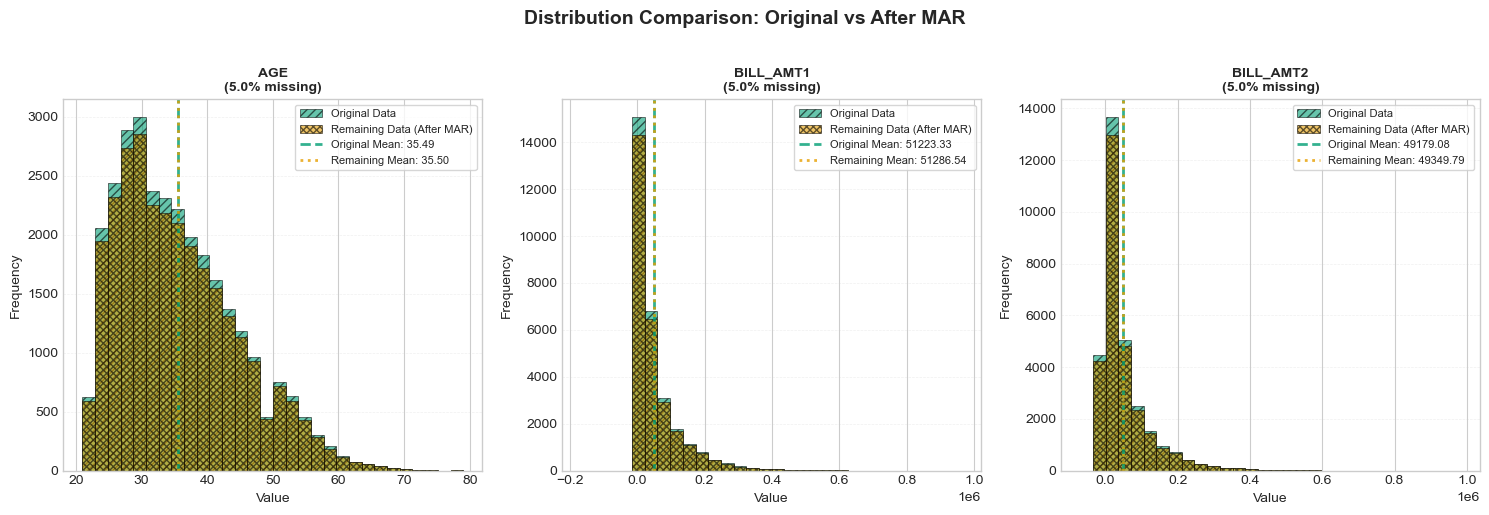

In [75]:
def plot_distribution_comparison(df_original, df_with_missing, cols, color_palette=None):
    """
    Visualize distributions of selected columns before and after introducing MAR values.
    Includes color-blind-friendly palette, hatch patterns, and mean reference lines.
    """
    import matplotlib.patches as mpatches
    
    # Default color-blind-safe palette (teal vs orange)
    if color_palette is None:
        color_palette = ["#009E73", "#E69F00"]  # teal & orange
    
    n_cols = len(cols)
    n_rows = (n_cols + 2) // 3  # up to 3 per row
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
    axes = axes.flatten() if n_cols > 1 else [axes]
    
    for idx, col in enumerate(cols):
        ax = axes[idx]
        
        # Get non-null values
        original_data = df_original[col].dropna()
        remaining_data = df_with_missing[col].dropna()
        
        bins = 30
        
        # -----------------------
        # histograms
        # -----------------------
        ax.hist(original_data, bins=bins, alpha=0.6,
                color=color_palette[0], label='Original Data',
                edgecolor='black', linewidth=0.6, hatch='////')
        
        ax.hist(remaining_data, bins=bins, alpha=0.6,
                color=color_palette[1], label='Remaining Data (After MAR)',
                edgecolor='black', linewidth=0.6, hatch='xxxxx')
        
        # -----------------------
        # Mean lines
        # -----------------------
        ax.axvline(original_data.mean(), color=color_palette[0],
                   linestyle='--', linewidth=2, alpha=0.8,
                   label=f'Original Mean: {original_data.mean():.2f}')
        
        ax.axvline(remaining_data.mean(), color=color_palette[1],
                   linestyle=':', linewidth=2, alpha=0.8,
                   label=f'Remaining Mean: {remaining_data.mean():.2f}')
        
        # -----------------------
        # Stats & labels
        # -----------------------
        missing_pct = (len(original_data) - len(remaining_data)) / len(original_data) * 100
        ax.set_title(f'{col}\n({missing_pct:.1f}% missing)', fontsize=10, fontweight='bold')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
        
        # Adjust legend for clarity
        ax.legend(loc='upper right', fontsize=8, frameon=True)
    
    # Hiding extra subplots
    for idx in range(len(cols), len(axes)):
        axes[idx].set_visible(False)
    
    # -----------------------
    # Global figure title & layout
    # -----------------------
    plt.suptitle('Distribution Comparison: Original vs After MAR',
                 fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()


# Example usage:
plot_distribution_comparison(data, df, mar_cols)

<div style="background: linear-gradient(120deg, #0d9488, #06b6d4, #3b82f6); padding:22px 26px; border-radius:18px; color:white; box-shadow:0 6px 22px rgba(0,0,0,0.18); font-family:system-ui, -apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif;">

  <h3 style="margin-top:0; font-size:24px; display:flex; align-items:center; gap:10px;">
    📉 <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:3px;">Impact of Missing at Random (MAR) on Data Distribution</span>
  </h3>

  <p style="font-size:16px; line-height:1.65; background:rgba(255,255,255,0.15); padding:14px 18px; border-radius:10px;">
    We introduced missing values using the <strong>Missing At Random (MAR)</strong> mechanism, 
    where data points are removed <em>based on correlations with other variables</em> rather than completely at random.  
    The histograms above compare the <strong>original complete data distribution</strong> (blue) 
    with the <strong>remaining data after introducing missingness</strong> (orange).  
    As observed, the overall shape of the distributions remains largely similar, 
    confirming that MAR tends to <strong>preserve the underlying data patterns</strong>, 
    though slight shifts in means may occur due to dependencies between features.
  </p>

  <div style="margin-top:10px; font-size:14px; opacity:0.9;">
    💡 <em>This verification step ensures that missingness does not distort the original data distribution, 
    maintaining realism for subsequent imputation analysis.</em>
  </div>
</div>

<div style="background: linear-gradient(120deg, #3b82f6, #6366f1, #8b5cf6); padding:22px 26px; border-radius:18px; color:white; box-shadow:0 6px 22px rgba(0,0,0,0.18); font-family:system-ui, -apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif;">

  <h3 style="margin-top:0; font-size:24px; display:flex; align-items:center; gap:10px;">
    🧮 <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:3px;">
      Part A2 — Imputation Strategy 1: Simple Imputation (Baseline)
    </span>
  </h3>

  <p style="font-size:16px; line-height:1.65; background:rgba(255,255,255,0.15); padding:14px 18px; border-radius:10px;">
    This baseline approach uses a straightforward <strong>median-based imputation</strong> method to fill 
    in missing values. For each selected column with missing data, the <code>median</code> of the observed 
    (non-missing) values is computed and substituted for all missing entries.  
    This simple yet effective technique provides a <strong>reference point</strong> to compare more advanced 
    imputation strategies applied later.
  </p>

  <div style="margin-top:10px; font-size:14px; opacity:0.9;">
    💡 <em>Median imputation is robust to outliers and offers a reliable first-step baseline for numerical features.</em>
  </div>
</div>

In [76]:
# Create Dataset A (copy of df with missing values)
dataset_A = df.copy()

# Identify columns with missing values
cols_with_missing = dataset_A.columns[dataset_A.isnull().any()]
print(f"Columns with missing values: {list(cols_with_missing)}")

# Apply Median Imputation (explicit assignment, no inplace warning)
for col in cols_with_missing:
    median_value = dataset_A[col].median()
    dataset_A[col] = dataset_A[col].fillna(median_value)

print("✅ Simple Median Imputation Applied Successfully! (Dataset A created)")

# Verify that there are no missing values now
print("\n🔍 Missing values per column (after imputation):")
print(dataset_A.isnull().sum()[cols_with_missing])

Columns with missing values: ['AGE', 'BILL_AMT1', 'BILL_AMT2']
✅ Simple Median Imputation Applied Successfully! (Dataset A created)

🔍 Missing values per column (after imputation):
AGE          0
BILL_AMT1    0
BILL_AMT2    0
dtype: int64


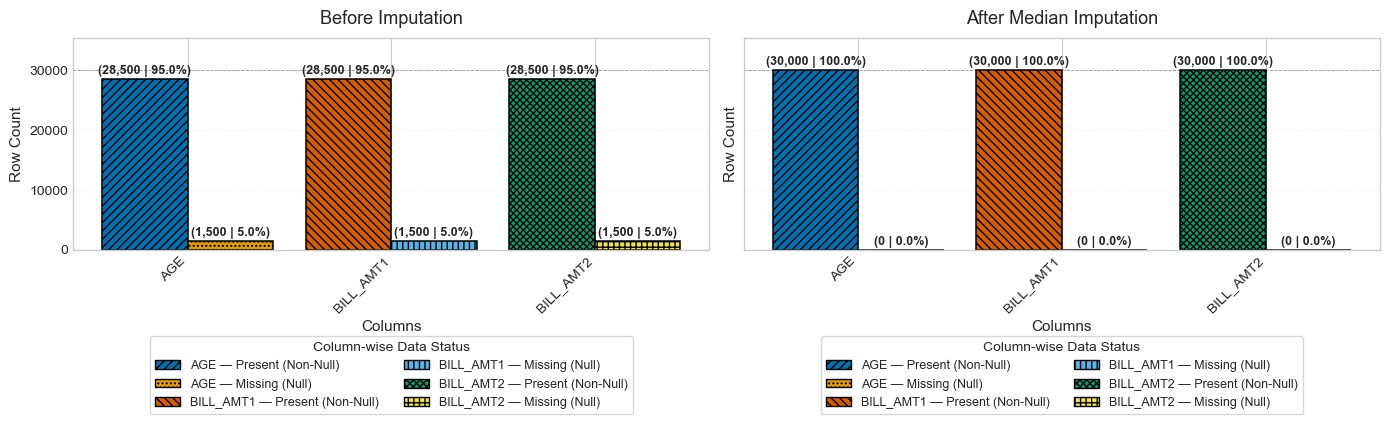

In [77]:
# =========================================================
# 📊 Before vs After Imputation — Column-wise Non-Null/Null Counts
# =========================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

total_rows = len(df)
missing_before = df[cols_with_missing].isnull().sum()
present_before = total_rows - missing_before
missing_after = dataset_A[cols_with_missing].isnull().sum()
present_after = total_rows - missing_after

x_pos = np.arange(len(cols_with_missing))
bar_width = 0.42
color_blind_palette = ["#0072B2", "#D55E00", "#009E73", "#F0E442", "#56B4E9", "#E69F00"]
hatch_patterns = ['////', '\\\\\\\\', 'xxxxx', '....', '|||', '+++']

from matplotlib.patches import Patch

def draw_panel(ax, present_counts, missing_counts, title_text):
    bars_present, bars_missing = [], []

    for i, col in enumerate(cols_with_missing):
        c_present = color_blind_palette[i % len(color_blind_palette)]
        c_missing = color_blind_palette[::-1][i % len(color_blind_palette)]
        h_present = hatch_patterns[i % len(hatch_patterns)]
        h_missing = hatch_patterns[(i + 3) % len(hatch_patterns)]

        bp = ax.bar(i - bar_width/2, present_counts[col],
                    width=bar_width, color=c_present,
                    edgecolor='black', linewidth=1.1, hatch=h_present)
        bm = ax.bar(i + bar_width/2, missing_counts[col],
                    width=bar_width, color=c_missing,
                    edgecolor='black', linewidth=1.1, hatch=h_missing)
        bars_present.append(bp); bars_missing.append(bm)

        pp = (present_counts[col] / total_rows) * 100
        mp = (missing_counts[col] / total_rows) * 100

        ax.text(i - bar_width/2, present_counts[col] + total_rows*0.01,
                f"({present_counts[col]:,} | {pp:.1f}%)",
                ha='center', va='bottom', fontsize=9, fontweight='600')
        ax.text(i + bar_width/2, missing_counts[col] + total_rows*0.01,
                f"({missing_counts[col]:,} | {mp:.1f}%)",
                ha='center', va='bottom', fontsize=9, fontweight='600')

    ax.axhline(y=total_rows, color='black', linestyle='--', linewidth=0.6, alpha=0.4)
    ax.set_xlabel('Columns', fontsize=11)
    ax.set_ylabel('Row Count', fontsize=11)
    ax.set_title(title_text, fontsize=13, pad=10)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(cols_with_missing, rotation=45, ha='right')
    ax.set_ylim(0, total_rows * 1.18)
    ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)

    legend_elements = []
    for i, col in enumerate(cols_with_missing):
        legend_elements.append(
            Patch(facecolor=color_blind_palette[i % len(color_blind_palette)],
                  edgecolor='black', hatch=hatch_patterns[i % len(hatch_patterns)],
                  label=f"{col} — Present (Non-Null)")
        )
        legend_elements.append(
            Patch(facecolor=color_blind_palette[::-1][i % len(color_blind_palette)],
                  edgecolor='black', hatch=hatch_patterns[(i + 3) % len(hatch_patterns)],
                  label=f"{col} — Missing (Null)")
        )

    ax.legend(handles=legend_elements, title="Column-wise Data Status",
              loc='upper center', bbox_to_anchor=(0.5, -0.38),  # 👈 slightly lower legend
              ncol=2, frameon=True, fontsize=9, title_fontsize=10)

draw_panel(axes[0], present_before, missing_before, "Before Imputation")
draw_panel(axes[1], present_after,  missing_after,  "After Median Imputation")

plt.tight_layout()
plt.show()

<div style="background: linear-gradient(120deg, #06b6d4, #3b82f6, #8b5cf6, #d946ef); padding:26px 30px; border-radius:22px; color:white; box-shadow:0 8px 25px rgba(0,0,0,0.2); font-family:system-ui, -apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif; line-height:1.7;">

  <h2 style="margin-top:0; font-size:28px; display:flex; align-items:center; gap:10px;">
    📊 <span style="border-bottom:3px solid rgba(255,255,255,0.6); padding-bottom:4px;">Imputation Strategy — Median Imputation</span>
  </h2>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:14px 0;">

  <h3 style="font-size:22px; margin-top:10px; display:flex; align-items:center; gap:10px;">
    🎯 <span style="border-bottom:2px solid rgba(255,255,255,0.4); padding-bottom:3px;">The Simple Yet Powerful Baseline</span>
  </h3>

  <p style="font-size:17px; background:rgba(255,255,255,0.15); padding:14px 20px; border-radius:12px;">
    Before diving into complex machine learning models for predicting missing values, we begin with a 
    <strong>simple yet reliable baseline approach — <span style='color:#fde68a;'>Median Imputation</span></strong>.  
    In this step, we create a new dataset called <strong>Dataset A</strong>, where every missing entry is replaced by 
    the <strong>median value</strong> of its respective column.
  </p>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:14px 0;">

  <h3 style="font-size:22px; margin-top:10px; display:flex; align-items:center; gap:10px;">
    💡 <span style="border-bottom:2px solid rgba(255,255,255,0.4); padding-bottom:3px;">Why Median and Not Mean?</span>
  </h3>

  <p style="font-size:17px; background:rgba(255,255,255,0.12); padding:14px 20px; border-radius:12px;">
    While both <strong>mean</strong> and <strong>median</strong> capture central tendency, the 
    <span style="color:#fde68a; font-weight:600;">median</span> is far more 
    <strong>robust in the presence of outliers</strong>.  
    Unlike the mean, which can be heavily influenced by extreme values, 
    the median provides a <strong>stable and resistant estimate</strong> of the data’s center.
  </p>

  <div style="margin-top:14px; font-size:15px; opacity:0.95; background:rgba(255,255,255,0.15); padding:12px 18px; border-radius:10px;">
    ✨ <em>Let’s visualize this effect with a real-world example below — observe how one extreme outlier can distort the mean but leaves the median nearly unchanged.</em>
  </div>
</div>

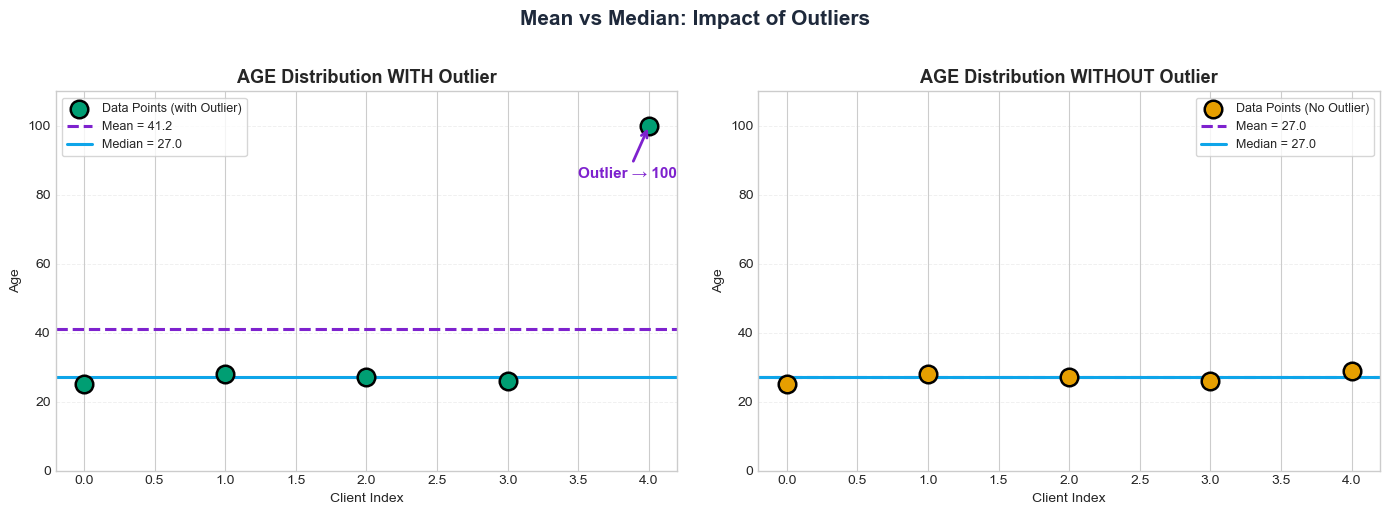


 MEAN vs MEDIAN COMPARISON

Scenario                  Mean            Median         
------------------------------------------------------------
With Outlier (100)        41.20           27.00          
Without Outlier           27.00           27.00          
Difference                14.20           0.00           

 Median remains stable despite the outlier!
 Mean is pulled significantly by the extreme value.



In [78]:
# Example data
ages_with_outlier = [25, 28, 27, 26, 100]
ages_without_outlier = [25, 28, 27, 26, 29]

# Statistics
mean_with, median_with = np.mean(ages_with_outlier), np.median(ages_with_outlier)
mean_without, median_without = np.mean(ages_without_outlier), np.median(ages_without_outlier)

# Setup
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(top=0.85)

# Color palette (teal/orange + purple/blue for lines)
point_colors = ["#009E73", "#E69F00"]     # teal & orange
line_colors  = {"mean": "#7e22ce", "median": "#0ea5e9"}  # purple & cyan-blue

# ---------- Plot 1: WITH Outlier ----------
axes[0].scatter(
    range(len(ages_with_outlier)), ages_with_outlier,
    s=160, c=point_colors[0], edgecolor='black', linewidth=1.8,
    zorder=3, label='Data Points (with Outlier)'
)
axes[0].axhline(y=mean_with, color=line_colors["mean"], linestyle='--',
                linewidth=2.2, label=f'Mean = {mean_with:.1f}')
axes[0].axhline(y=median_with, color=line_colors["median"], linestyle='-',
                linewidth=2.2, label=f'Median = {median_with:.1f}')

axes[0].annotate('Outlier → 100', xy=(4, 100), xytext=(3.5, 85),
                 arrowprops=dict(arrowstyle='->', color=line_colors["mean"], lw=2),
                 fontsize=11, color=line_colors["mean"], fontweight='bold')

axes[0].set_title('AGE Distribution WITH Outlier', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Client Index')
axes[0].set_ylabel('Age')
axes[0].set_ylim(0, 110)
axes[0].grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)
axes[0].legend(loc='upper left', fontsize=9, frameon=True)

# ---------- Plot 2: WITHOUT Outlier ----------
axes[1].scatter(
    range(len(ages_without_outlier)), ages_without_outlier,
    s=160, c=point_colors[1], edgecolor='black', linewidth=1.8,
    zorder=3, label='Data Points (No Outlier)'
)
axes[1].axhline(y=mean_without, color=line_colors["mean"], linestyle='--',
                linewidth=2.2, label=f'Mean = {mean_without:.1f}')
axes[1].axhline(y=median_without, color=line_colors["median"], linestyle='-',
                linewidth=2.2, label=f'Median = {median_without:.1f}')

axes[1].set_title('AGE Distribution WITHOUT Outlier', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Client Index')
axes[1].set_ylabel('Age')
axes[1].set_ylim(0, 110)
axes[1].grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)
axes[1].legend(loc='upper right', fontsize=9, frameon=True)

# ---------- Overall Title ----------
plt.suptitle('Mean vs Median: Impact of Outliers',
             fontsize=15, fontweight='bold', color='#1e293b', y=1.02)
plt.tight_layout()
plt.show()

# ---------- Comparison Table ----------
print("\n" + "="*60)
print(" MEAN vs MEDIAN COMPARISON")
print("="*60)
print(f"\n{'Scenario':<25} {'Mean':<15} {'Median':<15}")
print("-"*60)
print(f"{'With Outlier (100)':<25} {mean_with:<15.2f} {median_with:<15.2f}")
print(f"{'Without Outlier':<25} {mean_without:<15.2f} {median_without:<15.2f}")
print(f"{'Difference':<25} {abs(mean_with-mean_without):<15.2f} {abs(median_with-median_without):<15.2f}")
print("="*60)
print("\n Median remains stable despite the outlier!")
print(" Mean is pulled significantly by the extreme value.\n")

<div style="background: linear-gradient(120deg, #06b6d4, #8b5cf6, #1e3a8a); padding:34px 40px; border-radius:24px; color:white; box-shadow:0 10px 28px rgba(0,0,0,0.25); font-family:system-ui,-apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif; line-height:1.75;">

  <h2 style="margin-top:0; font-size:24px; display:flex; align-items:center; gap:10px;">
    📋 <span style="border-bottom:3px solid rgba(255,255,255,0.6); padding-bottom:4px;">Key Observations</span>
  </h2>

  <p style="font-size:17px; background:rgba(255,255,255,0.12); padding:14px 22px; border-radius:12px;">
    Comparing the <strong>mean</strong> and <strong>median</strong> illustrates how outliers can distort central tendency.  
    The table below highlights two scenarios—one with an extreme value and one without—to show why the median is more reliable in skewed data.
  </p>

  <table style="width:100%; border-collapse:collapse; margin-top:16px; background:rgba(255,255,255,0.1); border-radius:10px; overflow:hidden;">
    <thead style="background:rgba(255,255,255,0.15);">
      <tr>
        <th style="text-align:left; padding:10px;">Scenario</th>
        <th style="text-align:left; padding:10px;">Mean</th>
        <th style="text-align:left; padding:10px;">Median</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td style="padding:10px;">Ages: 25, 28, 27, 26, <strong>100</strong></td>
        <td style="padding:10px;">41.2</td>
        <td style="padding:10px;">27</td>
      </tr>
      <tr>
        <td style="padding:10px;">Ages: 25, 28, 27, 26, 29</td>
        <td style="padding:10px;">27.0</td>
        <td style="padding:10px;">27</td>
      </tr>
    </tbody>
  </table>

  <div style="margin-top:20px; display:flex; align-items:flex-start; gap:18px;">
    <div style="flex:1; background:rgba(255,255,255,0.12); padding:16px 18px; border-radius:12px;">
      <h4 style="margin-top:0; color:#fecaca;">❌ When Using Mean</h4>
      <ul style="margin-left:18px; line-height:1.6;">
        <li>Outliers <strong>distort the data distribution</strong></li>
        <li>Central tendency shifts toward extreme values</li>
        <li>Gives a <strong>misleading sense of “average”</strong></li>
      </ul>
    </div>

   <div style="flex:1; background:rgba(255,255,255,0.12); padding:16px 18px; border-radius:12px;">
      <h4 style="margin-top:0; color:#bbf7d0;">✅ When Using Median</h4>
      <ul style="margin-left:18px; line-height:1.6;">
        <li>Remains <strong>stable under extreme values</strong></li>
        <li><strong>Resistant to outliers</strong> in skewed distributions</li>
        <li>Better represents the <strong>typical observation</strong></li>
      </ul>
    </div>
  </div>

  <p style="margin-top:18px; background:rgba(255,255,255,0.1); padding:14px 20px; border-radius:12px;">
    💡 <strong>Notice:</strong> A single extreme value (<code>age = 100</code>) pulls the mean far away from the true center of the data,  
    while the median remains unchanged.  
    This demonstrates that the <strong>median is more robust and reliable</strong> for datasets with potential outliers—especially 
    in financial and credit-risk domains.
  </p>

</div>

<div style="background: linear-gradient(135deg, #0ea5e9, #6366f1, #a21caf); padding:28px 34px; border-radius:22px; color:white; box-shadow:0 8px 26px rgba(0,0,0,0.22); font-family:system-ui,-apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif; line-height:1.7;">

  <h2 style="margin-top:0; font-size:26px; display:flex; align-items:center; gap:10px;">
    🏦 <span style="border-bottom:3px solid rgba(255,255,255,0.6); padding-bottom:4px;">Why This Matters for Credit Risk Data</span>
  </h2>

  <p style="font-size:17px; background:rgba(255,255,255,0.12); padding:14px 20px; border-radius:12px;">
    In financial datasets such as <strong>credit card records</strong>, variables like 
    <code>BILL_AMT</code> or <code>LIMIT_BAL</code> often contain extreme values due to:
  </p>

  <ul style="font-size:16px; margin-left:25px; line-height:1.7;">
    <li>💰 High-spending customers</li>
    <li>📈 High-income clients</li>
    <li>🚨 Unusual transactions or data-entry errors</li>
  </ul>

  <div style="display:grid; grid-template-columns: 1fr 1fr; gap:20px; margin-top:20px;">
    <div style="background:rgba(255,255,255,0.15); padding:16px 18px; border-radius:12px;">
      <h3 style="margin-top:0; color:#fca5a5;">❌ Using the Mean Would:</h3>
      <ul style="margin-left:18px; line-height:1.6;">
        <li>Distort the data distribution</li>
        <li>Bias the model toward outliers</li>
        <li>Misrepresent typical customer behavior</li>
      </ul>

 <div style="background:rgba(255,255,255,0.15); padding:16px 18px; border-radius:12px;">
   <h3 style="margin-top:0; color:#bbf7d0;">✅ Using the Median Provides:</h3>
   <ul style="margin-left:18px; line-height:1.6;">
   <li>A more robust and fair baseline</li>
   <li>Better representation of typical values</li>
   <li>Stability for skewed distributions (common in credit risk datasets)</li>
    </ul>
  </div>

</div>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.35); margin:26px 0;">

  <h2 style="font-size:24px; display:flex; align-items:center; gap:10px;">
    ✅ <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:3px;">Outcome — Dataset A (Baseline)</span>
  </h2>

  <ul style="font-size:16px; margin-left:25px; line-height:1.7;">
    <li>✔️ <strong>All missing values</strong> successfully filled using median imputation</li>
    <li>✔️ Dataset remains numerically consistent and balanced</li>
    <li>✔️ Distributions stay stable and minimally distorted</li>
    <li>✔️ <strong>Dataset A</strong> serves as our <strong>baseline clean dataset</strong> for classifi


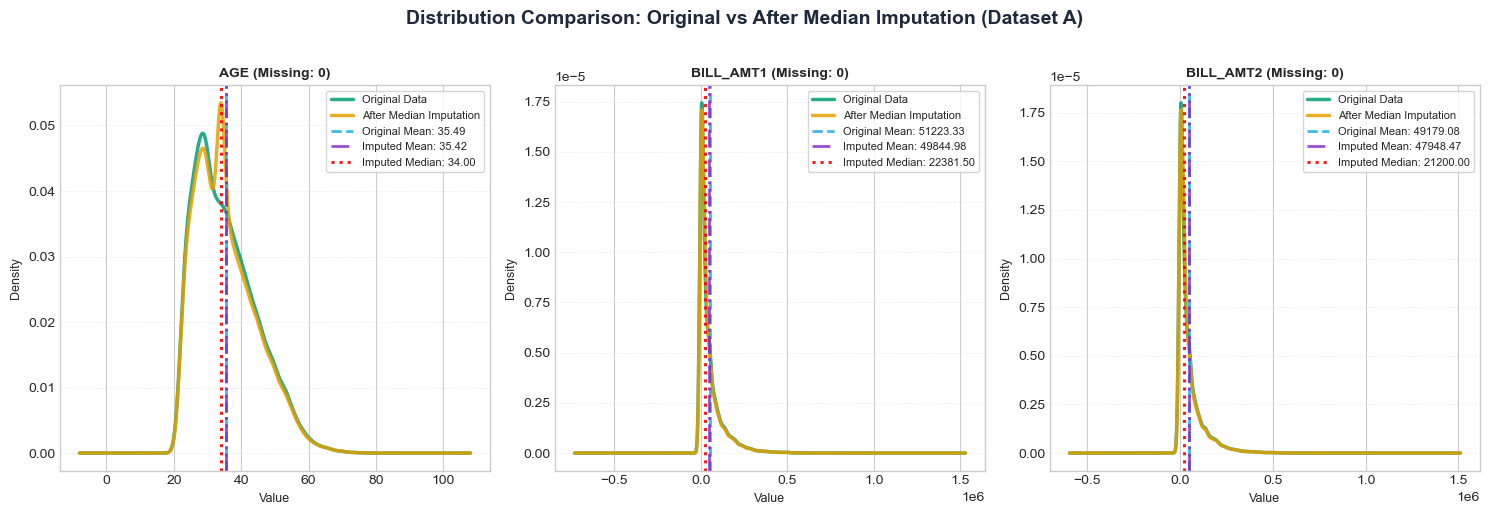

In [79]:
from scipy import stats

def plot_imputation_comparison(df_original, df_imputed, cols, color_palette=None):
    """
    Create smooth density plots comparing original data vs data after median imputation
    (color-blind-friendly, DA5401 A6 visual theme — keeps red dotted median line)
    """
    # Defining safe default palette
    if color_palette is None:
        color_palette = ["#009E73", "#E69F00"]  # teal & orange
    
    n_cols = len(cols)
    n_rows = (n_cols + 2) // 3  # 3 per row max
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
    axes = axes.flatten() if n_cols > 1 else [axes]
    
    for idx, col in enumerate(cols):
        ax = axes[idx]
        
        # Extracting data
        original_data = df_original[col].dropna()
        imputed_data = df_imputed[col].dropna()
        
        # Computing stats
        n_missing = df_original[col].isnull().sum()
        median_value = df_original[col].median()

        # KDE plots (smoothed densities)
        original_data.plot(kind='density', ax=ax,
                           color=color_palette[0], linewidth=2.5,
                           label='Original Data', alpha=0.85)
        imputed_data.plot(kind='density', ax=ax,
                          color=color_palette[1], linewidth=2.5,
                          label='After Median Imputation', alpha=0.85)

        # Mean lines (accessible hues)
        ax.axvline(original_data.mean(), color='#0ea5e9', linestyle='--',
                   linewidth=2, alpha=0.8, label=f'Original Mean: {original_data.mean():.2f}')
        ax.axvline(imputed_data.mean(), color='#7e22ce', linestyle='-.',
                   linewidth=2, alpha=0.8, label=f'Imputed Mean: {imputed_data.mean():.2f}')

        # Median line — red dotted
        ax.axvline(median_value, color='red', linestyle=':',
                   linewidth=2.2, alpha=0.9, label=f'Imputed Median: {median_value:.2f}')
        
        # Labels & grid
        ax.set_title(f'{col} (Missing: {n_missing})', fontsize=10, fontweight='bold', pad=6)
        ax.set_xlabel('Value', fontsize=9)
        ax.set_ylabel('Density', fontsize=9)
        ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.6)

        # Legend (neatly framed)
        ax.legend(loc='upper right', fontsize=8, frameon=True)
    
    # Hiding unused subplots
    for idx in range(len(cols), len(axes)):
        axes[idx].set_visible(False)
    
    # Global layout
    plt.suptitle('Distribution Comparison: Original vs After Median Imputation (Dataset A)',
                 fontsize=14, fontweight='bold', color='#1e293b', y=1.02)
    plt.tight_layout()
    plt.show()


# Example usage:
imputation_cols = ['AGE', 'BILL_AMT1', 'BILL_AMT2']
plot_imputation_comparison(data, dataset_A, imputation_cols)

<div style="background: linear-gradient(135deg, #14b8a6, #3b82f6, #8b5cf6); padding:26px 32px; border-radius:20px; color:white; box-shadow:0 8px 24px rgba(0,0,0,0.22); font-family:system-ui,-apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif; line-height:1.7;">

  <h2 style="margin-top:0; font-size:26px; display:flex; align-items:center; gap:10px;">
    📊 <span style="border-bottom:3px solid rgba(255,255,255,0.6); padding-bottom:4px;">Distribution Comparison — Original vs Median Imputation (Dataset A)</span>
  </h2>

  <p style="font-size:17px; background:rgba(255,255,255,0.12); padding:14px 20px; border-radius:12px;">
    The visualizations below compare the <strong>distribution of continuous variables</strong> before and after applying 
    <strong>median imputation</strong>.
    <br><br>
    The <span style="color:#f87171; font-weight:600;">red dotted line</span> represents the <strong>median value</strong> used to fill 
    missing data, while the <span style="color:#60a5fa; font-weight:600;">blue dashed line</span> and 
    <span style="color:#34d399; font-weight:600;">green dashed line</span> correspond to the 
    <strong>mean values</strong> of the original and imputed data respectively.
  </p>

  <p style="margin-top:14px; font-size:16px; line-height:1.7; background:rgba(255,255,255,0.1); padding:14px 20px; border-radius:12px;">
    🧩 <strong>Observation:</strong> Notice the <em>artificial spike</em> around the median in the imputed data 
    (<span style="color:#34d399; font-weight:600;">green histogram</span>), illustrating how 
    <strong>simple median imputation</strong> can slightly <span style="color:#fde68a;">distort</span> the original 
    distribution and <span style="color:#fde68a;">reduce variance</span> within the dataset.
  </p>

</div>

<div style="background: linear-gradient(135deg, #06b6d4, #3b82f6, #8b5cf6); padding:30px 36px; border-radius:22px; color:white; box-shadow:0 10px 28px rgba(0,0,0,0.25); font-family:system-ui, -apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif; line-height:1.75;">

  <h2 style="margin-top:0; font-size:28px; display:flex; align-items:center; gap:10px;">
    🧮 <span style="border-bottom:3px solid rgba(255,255,255,0.6); padding-bottom:4px;">Part A3 — Imputation Strategy 2 — Regression Imputation (Linear)</span>
  </h2>

  <h3 style="font-size:22px; color:#dbeafe; margin-top:6px;">📈 Linear Regression Imputation</h3>

  <p style="font-size:17px; background:rgba(255,255,255,0.12); padding:14px 20px; border-radius:12px;">
    After establishing a strong <strong>baseline with median imputation</strong>, we now adopt a
    <span style="color:#fcd34d; font-weight:600;">data-driven approach</span> —
    leveraging <strong>Linear Regression</strong> to estimate missing values based on inter-feature relationships.
  </p>

  <h3 style="font-size:22px; margin-top:20px; color:#bfdbfe;">🎯 The Approach</h3>

  <p style="font-size:17px; line-height:1.7;">
    In this step, we focus on imputing missing values in the feature <strong>AGE</strong>.  
    To ensure reliability, all other columns containing missing data are removed.
    <br><br>
    A <strong>Linear Regression Model</strong> is then trained using remaining features — 
    such as <em>education level</em>, <em>bill amounts</em>, and <em>repayment history</em> — 
    to learn how <strong>AGE</strong> correlates with these predictors.
    Once trained, the model predicts missing AGE values for incomplete records.
  </p>

  <div style="background:rgba(255,255,255,0.15); border-radius:14px; padding:18px 22px; margin-top:20px;">
    <h3 style="margin-top:0; color:#f9fafb;">📐 Linear Algebra Behind Regression Imputation</h3>

   <p style="font-size:17px;">
      Linear Regression finds the best-fit hyperplane satisfying:
      <br><br>
      <strong>ŷ = Xβ + ε</strong>
      <br><br>
      Where:
      <ul style="margin-left:20px; line-height:1.7;">
        <li><strong>ŷ</strong> = Predicted AGE values (target)</li>
        <li><strong>X</strong> = Matrix of predictor variables (non-missing features)</li>
        <li><strong>β</strong> = Coefficient vector (weights learned by the model)</li>
        <li><strong>ε</strong> = Residual error term</li>
      </ul>
    </p>

  <p style="font-size:17px;">
      The optimal β is computed using the <strong>Normal Equation</strong>:
      <br><br>
      <strong>β = (X<sup>T</sup>X)<sup>−1</sup>X<sup>T</sup>y</strong>
      <br><br>
      This minimizes the sum of squared errors between predicted and actual values.
      Once β is obtained, missing AGE values are predicted as <strong>X × β</strong>, 
      yielding a mathematically consistent estimate.
    </p>
  </div>

  <div style="margin-top:18px; font-size:15px; opacity:0.9;">
    💡 <em>This approach not only preserves natural correlations but also
    improves imputation realism compared to simple median filling.</em>
  </div>
</div>


In [80]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Create Dataset B (copy from df with missing values)
dataset_B = df.copy()

# Step 2: Choose the column to impute (e.g., 'AGE')
target_col = 'AGE'

# Step 3: Remove other columns that also have missing values
cols_with_missing = dataset_B.columns[dataset_B.isnull().any()]
other_missing_cols = [col for col in cols_with_missing if col != target_col]
dataset_B = dataset_B.drop(columns=other_missing_cols)

print(f"Removed columns with other missing values: {other_missing_cols}")
print(f"Target column for regression imputation: {target_col}")

# Step 4: Split data into two subsets: rows with and without missing AGE
train_data = dataset_B[dataset_B[target_col].notnull()]
test_data = dataset_B[dataset_B[target_col].isnull()]

# Step 5: Separate features (X) and target (y)
X_train = train_data.drop(columns=[target_col, 'ID'])  # Drop ID to avoid bias
y_train = train_data[target_col]

# Align test data with same feature columns
X_test = test_data.drop(columns=[target_col, 'ID'])

# Step 6: Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Step 7: Predict missing AGE values
predicted_ages = lin_reg.predict(X_test)

# Step 8: Fill predicted values back into the dataset
dataset_B.loc[dataset_B[target_col].isnull(), target_col] = predicted_ages

print("✅ Linear Regression Imputation Completed Successfully for 'AGE'")

# Step 9: Confirm no missing AGE values remain
print(f"Remaining Missing Values in AGE: {dataset_B['AGE'].isnull().sum()}")

Removed columns with other missing values: ['BILL_AMT1', 'BILL_AMT2']
Target column for regression imputation: AGE
✅ Linear Regression Imputation Completed Successfully for 'AGE'
Remaining Missing Values in AGE: 0


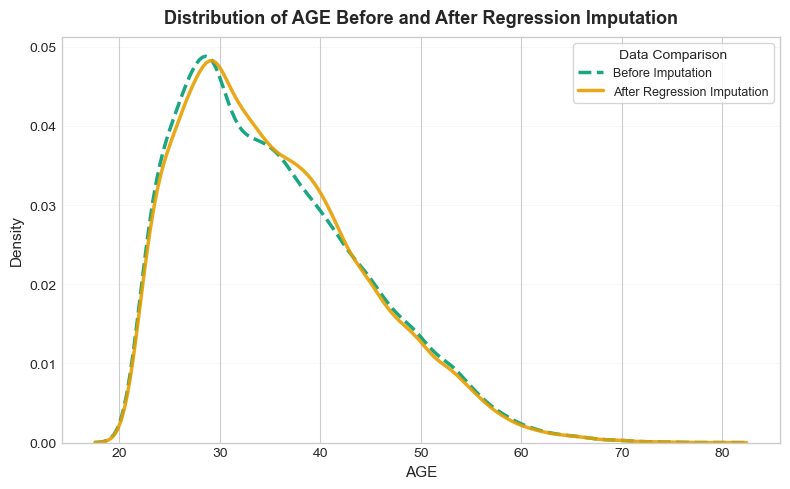

In [81]:
plt.figure(figsize=(8, 5))

# KDE plots with accessible colors and distinct line styles
sns.kdeplot(
    data['AGE'],
    label='Before Imputation',
    color="#009E73",        # Teal (color-blind safe)
    linestyle='--',         # dashed pattern
    linewidth=2.5,
    alpha=0.9
)

sns.kdeplot(
    dataset_B['AGE'],
    label='After Regression Imputation',
    color="#E69F00",        # Orange (color-blind safe)
    linestyle='-',          # solid line
    linewidth=2.5,
    alpha=0.9
)

# Plot styling
plt.title("Distribution of AGE Before and After Regression Imputation",
          fontsize=13, fontweight='bold', pad=10)
plt.xlabel("AGE", fontsize=11)
plt.ylabel("Density", fontsize=11)
plt.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)

# Clear, styled legend
plt.legend(
    title="Data Comparison",
    fontsize=9,
    title_fontsize=10,
    frameon=True,
    loc='upper right'
)

plt.tight_layout()
plt.show()

<div style="background: linear-gradient(135deg, #7c3aed, #db2777, #1e3a8a); padding:32px 36px; border-radius:22px; color:white; box-shadow:0 10px 28px rgba(0,0,0,0.25); font-family:system-ui,-apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif; line-height:1.75;">

  <h3 style="margin-top:0; font-size:26px; display:flex; align-items:center; gap:10px;">
    🧩 <span style="border-bottom:3px solid rgba(255,255,255,0.6); padding-bottom:3px;">Underlying Assumption — "Missing At Random (MAR)"</span>
  </h3>

  <p style="font-size:17px; background:rgba(255,255,255,0.12); padding:14px 20px; border-radius:12px;">
    Linear Regression Imputation operates under the <strong>Missing At Random (MAR)</strong> assumption.  
    This means that the <strong>probability of a value being missing depends on other observed variables</strong>, but not on the missing value itself.
  </p>

  <div style="display:grid; grid-template-columns: 1fr 1fr; gap:18px; margin-top:18px;">
    <div style="background:rgba(255,255,255,0.1); padding:16px 18px; border-radius:12px;">
      <h4 style="margin-top:0; color:#bbf7d0;">✅ Example: MAR (Works Well)</h4>
      <p style="font-size:16px; margin:0;">
        If <strong>younger clients</strong> are less likely to report their <code>AGE</code>, but we know their
        <em>payment history</em> and <em>credit limit</em>,  
        we can accurately predict the missing ages using correlated variables.
      </p>
    </div>

   <div style="background:rgba(255,255,255,0.1); padding:16px 18px; border-radius:12px;">
      <h4 style="margin-top:0; color:#fecaca;">❌ Example: MNAR (Fails)</h4>
      <p style="font-size:16px; margin:0;">
        If missingness depends directly on the value itself — e.g., <em>people with very high age avoid disclosing it</em> —  
        the data becomes <strong>Missing Not At Random (MNAR)</strong>, and regression cannot fully correct the bias.
      </p>
    </div>
  </div>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:28px 0;">

  <h3 style="font-size:24px; display:flex; align-items:center; gap:10px;">
    📈 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:3px;">Why Regression Imputation is Useful</span>
  </h3>

  <div style="display:grid; grid-template-columns: 1fr 1fr; gap:18px; margin-top:16px;">
    <div style="background:rgba(255,255,255,0.12); padding:16px 18px; border-radius:12px;">
      <h4 style="margin-top:0; color:#bbf7d0;">✅ Advantages</h4>
      <ul style="margin-left:18px; line-height:1.6;">
        <li>Uses <strong>relationships between variables</strong> instead of global statistics</li>
        <li>Preserves <strong>multivariate correlations</strong> for realistic imputations</li>
        <li>Generates <strong>data-informed</strong> predictions rather than arbitrary values</li>
        <li>Leverages the full feature space for <strong>educated estimates</strong></li>
      </ul>
    </div>

  <div style="background:rgba(255,255,255,0.12); padding:16px 18px; border-radius:12px;">
      <h4 style="margin-top:0; color:#fecaca;">⚠️ Limitations</h4>
      <ul style="margin-left:18px; line-height:1.6;">
        <li>Can introduce <strong>model bias</strong> if regression is poorly specified</li>
        <li>Assumes <strong>linear relationships</strong> between predictors and target</li>
        <li>May <strong>underestimate variance</strong> — imputed points lie exactly on the regression line</li>
        <li>Sensitive to <strong>outliers</strong> and <strong>multicollinearity</strong></li>
      </ul>
    </div>
  </div>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:28px 0;">

  <h3 style="font-size:24px; display:flex; align-items:center; gap:10px;">
    🔍 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:3px;">Mathematical Insight</span>
  </h3>

  <p style="font-size:17px; background:rgba(255,255,255,0.12); padding:14px 20px; border-radius:12px;">
    The regression-based imputation process <strong>projects incomplete data</strong> onto a lower-dimensional 
    subspace defined by observed variables.  
    <br><br>
    This projection is used to estimate missing values based on learned relationships.  
    Unlike median imputation — which applies a single global statistic — regression imputation 
    <strong>preserves structure and variance</strong> by leveraging correlations among multiple features.
  </p>

</div>

<div style="background: linear-gradient(135deg, #06b6d4, #3b82f6, #db2777); padding:32px 36px; border-radius:22px; color:white; box-shadow:0 10px 28px rgba(0,0,0,0.25); font-family:system-ui,-apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif; line-height:1.75;">

  <h2 style="margin-top:0; font-size:28px; display:flex; align-items:center; gap:10px;">
    🤖 <span style="border-bottom:3px solid rgba(255,255,255,0.6); padding-bottom:4px;">Part A3 — Imputation Strategy 3: Regression Imputation (Non-Linear)</span>
  </h2>

  <h3 style="font-size:22px; margin-top:4px; color:#e0f2fe;">K-Nearest Neighbors (KNN) Regression Imputation</h3>

  <p style="font-size:17px; background:rgba(255,255,255,0.12); padding:14px 20px; border-radius:12px;">
    After linear regression, we step into <strong>non-linear modeling</strong> where relationships need not be straight lines.  
    We create <strong>Dataset C</strong> and impute <code>AGE</code> using <strong>K-Nearest Neighbors (KNN) Regression</strong> — 
    an instance-based method that <em>assumes no parametric form</em> and adapts to local patterns in the data.
  </p>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:22px 0;">

  <h3 style="font-size:22px; display:flex; align-items:center; gap:10px;">
    🧩 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:3px;">How KNN Works</span>
  </h3>

  <div style="background:rgba(255,255,255,0.12); padding:16px 20px; border-radius:12px;">
    <p style="font-size:17px; margin:0 0 8px 0;">KNN imputes by <strong>similarity</strong> and <strong>local averaging</strong>:</p>
    <ol style="margin:0 0 0 22px; line-height:1.7;">
      <li>For a record with missing <code>AGE</code>, compute its <strong>distance</strong> to all records with known ages using observed features (education, bills, payments, etc.).</li>
      <li>Find the <strong>k most similar neighbors</strong>.</li>
      <li><strong>Impute AGE</strong> as the (possibly weighted) average of neighbors’ ages.</li>
    </ol>
    <p style="margin-top:10px;">This naturally captures <strong>non-linear and local patterns</strong> that linear models can miss.</p>
  </div>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:22px 0;">

  <h3 style="font-size:22px; display:flex; align-items:center; gap:10px;">
    📐 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:3px;">Mathematical Foundation</span>
  </h3>

  <div style="display:grid; grid-template-columns: 1fr 1fr; gap:18px;">
    <div style="background:rgba(255,255,255,0.12); padding:16px 18px; border-radius:12px;">
      <h4 style="margin-top:0; color:#bbf7d0;">Distance Metrics</h4>
      <p style="margin:8px 0 10px;">Most common: <strong>Euclidean Distance</strong></p>
      <p style="font-family:ui-monospace, SFMono-Regular, Menlo, monospace; background:rgba(0,0,0,0.25); padding:10px 12px; border-radius:10px; margin:0;">
        d(x, x′) = √(Σ<sub>i</sub> (x<sub>i</sub> − x′<sub>i</sub>)²)
      </p>
      <p style="margin-top:10px; font-size:15px; opacity:0.95;">
        <strong>x</strong> = feature vector of the incomplete record, 
        <strong>x′</strong> = feature vector of a candidate neighbor.
      </p>
    </div>

  <div style="background:rgba(255,255,255,0.12); padding:16px 18px; border-radius:12px;">
      <h4 style="margin-top:0; color:#d1fae5;">Weighted KNN</h4>
      <p style="margin:8px 0 10px;">Closer neighbors influence more:</p>
      <p style="font-family:ui-monospace, SFMono-Regular, Menlo, monospace; background:rgba(0,0,0,0.25); padding:10px 12px; border-radius:10px; margin:0;">
        ŷ = Σ<sub>i</sub> w<sub>i</sub> · y<sub>i</sub> / Σ<sub>i</sub> w<sub>i</sub>, &nbsp; where &nbsp; w<sub>i</sub> = 1 / d(x, x<sub>i</sub>)
      </p>
    </div>
  </div>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:22px 0;">

  <h3 style="font-size:22px; display:flex; align-items:center; gap:10px;">
    ⚙️ <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:3px;">Why a Non-Linear Model?</span>
  </h3>

  <div style="background:rgba(255,255,255,0.1); padding:16px 18px; border-radius:12px;">
    <p style="margin:0 0 8px;">Real credit data often shows <strong>complex, non-linear patterns</strong>:</p>
    <ul style="margin:0 0 0 22px; line-height:1.7;">
      <li>AGE effects may differ across income or education levels.</li>
      <li>Default risk can be <strong>U-shaped</strong> across age bands.</li>
      <li>AGE–BILL relationships vary by credit limit ranges.</li>
    </ul>
    <p style="margin-top:10px;">KNN captures <strong>local curvature and interactions</strong> that linear regression may oversimplify.</p>
  </div>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:22px 0;">

  <h3 style="font-size:22px; display:flex; align-items:center; gap:10px;">
    🎯 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:3px;">Choosing <em>k</em> (Hyperparameter)</span>
  </h3>

  <div style="display:grid; grid-template-columns: 1fr 1fr; gap:18px;">
    <div style="background:rgba(255,255,255,0.12); padding:16px 18px; border-radius:12px;">
      <h4 style="margin-top:0; color:#fde68a;">Small k (e.g., 1–3)</h4>
      <ul style="margin:6px 0 0 18px; line-height:1.6;">
        <li>✅ Captures fine-grained local patterns</li>
        <li>❌ Sensitive to noise/outliers</li>
        <li>❌ High variance, low bias</li>
      </ul>
    </div>
    <div style="background:rgba(255,255,255,0.12); padding:16px 18px; border-radius:12px;">
      <h4 style="margin-top:0; color:#c7d2fe;">Large k (e.g., 20–50)</h4>
      <ul style="margin:6px 0 0 18px; line-height:1.6;">
        <li>✅ More stable; less sensitive to noise</li>
        <li>❌ May smooth away local structure</li>
        <li>❌ Low variance, higher bias</li>
      </ul>
    </div>
  </div>

  <p style="margin-top:12px;">
    <strong>Best practice:</strong> pick <em>k</em> via <strong>cross-validation</strong> to balance bias–variance.
  </p>

</div>


In [82]:
# Step 1: Create Dataset C (copy from df with missing values)
dataset_C = df.copy()

# Step 2: Choose the same target column ('AGE')
target_col = 'AGE'

# Step 3: Remove other columns that have missing values
cols_with_missing = dataset_C.columns[dataset_C.isnull().any()]
other_missing_cols = [col for col in cols_with_missing if col != target_col]
dataset_C = dataset_C.drop(columns=other_missing_cols)

print(f"Removed columns with other missing values: {other_missing_cols}")
print(f"Target column for non-linear imputation: {target_col}")

# Step 4: Split data into training (non-missing AGE) and test (missing AGE)
train_data = dataset_C[dataset_C[target_col].notnull()]
test_data = dataset_C[dataset_C[target_col].isnull()]

# Step 5: Separate features and target
X_train = train_data.drop(columns=[target_col, 'ID'])
y_train = train_data[target_col]
X_test = test_data.drop(columns=[target_col, 'ID'])

# Step 6: Scale features for distance-based methods like KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train a non-linear regression model (KNN Regressor)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)

# Step 8: Predict missing AGE values
predicted_ages_knn = knn_reg.predict(X_test_scaled)

# Step 9: Fill in the predicted values back to dataset
dataset_C.loc[dataset_C[target_col].isnull(), target_col] = predicted_ages_knn

print("✅ Non-Linear (KNN) Regression Imputation Completed Successfully for 'AGE'")

# Step 10: Confirm imputation
print(f"Remaining Missing Values in AGE: {dataset_C['AGE'].isnull().sum()}")

Removed columns with other missing values: ['BILL_AMT1', 'BILL_AMT2']
Target column for non-linear imputation: AGE
✅ Non-Linear (KNN) Regression Imputation Completed Successfully for 'AGE'
Remaining Missing Values in AGE: 0


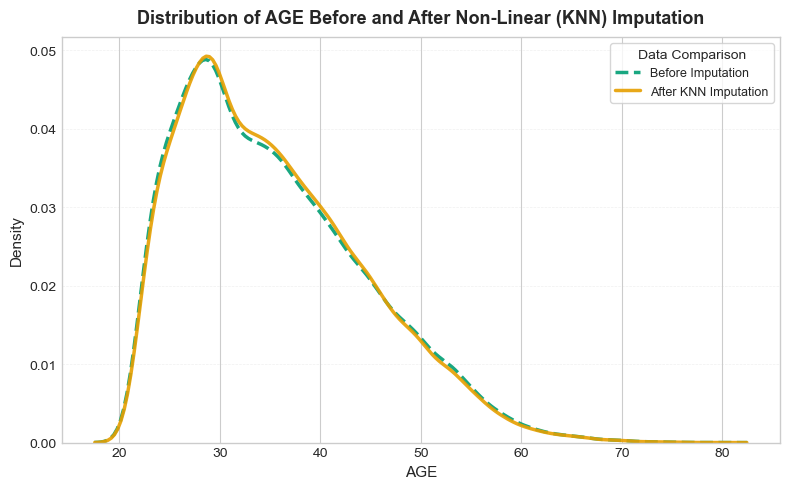

In [83]:
plt.figure(figsize=(8, 5))

# KDE 1 – Before Imputation
sns.kdeplot(
    data['AGE'],
    label='Before Imputation',
    color="#009E73",       # Teal — color-blind friendly
    linestyle='--',        # dashed
    linewidth=2.5,
    alpha=0.9
)

# KDE 2 – After KNN Imputation
sns.kdeplot(
    dataset_C['AGE'],
    label='After KNN Imputation',
    color="#E69F00",       # Orange — color-blind friendly
    linestyle='-',         # solid line
    linewidth=2.5,
    alpha=0.9
)

# Styling
plt.title("Distribution of AGE Before and After Non-Linear (KNN) Imputation",
          fontsize=13, fontweight='bold', pad=10)
plt.xlabel("AGE", fontsize=11)
plt.ylabel("Density", fontsize=11)
plt.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)

# Legend — neat and clear
plt.legend(
    title="Data Comparison",
    fontsize=9,
    title_fontsize=10,
    frameon=True,
    loc='upper right'
)

plt.tight_layout()
plt.show()

<div style="background: linear-gradient(135deg, #0ea5e9, #6366f1, #a855f7); padding:32px 38px; border-radius:22px; color:white; box-shadow:0 10px 30px rgba(0,0,0,0.25); font-family:system-ui,-apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif; line-height:1.75;">

  <h2 style="margin-top:0; font-size:26px; display:flex; align-items:center; gap:10px;">
    🧩 <span style="border-bottom:3px solid rgba(255,255,255,0.6); padding-bottom:3px;">Underlying Assumption — Still “Missing At Random (MAR)”</span>
  </h2>

  <p style="font-size:17px; background:rgba(255,255,255,0.12); padding:14px 20px; border-radius:12px;">
    Just like linear regression, <strong>KNN imputation</strong> assumes that missing values are 
    <strong>Missing At Random (MAR)</strong> — meaning that 
    the <strong>probability of missingness</strong> depends on other <em>observed variables</em>, not on the missing value itself.
  </p>

  <div style="display:grid; grid-template-columns: 1fr 1fr; gap:20px; margin-top:16px;">
    <div style="background:rgba(255,255,255,0.12); padding:16px 18px; border-radius:12px;">
      <h4 style="margin-top:0; color:#bbf7d0;">✅ MAR Example</h4>
      <ul style="margin-left:18px; line-height:1.6;">
        <li>AGE might be missing for some clients,</li>
        <li>but the probability of missingness depends on <strong>education level</strong>, <strong>credit limit</strong>, or <strong>repayment history</strong>.</li>
        <li>Thus, we can infer AGE using these correlated features.</li>
      </ul>
    </div>
    <div style="background:rgba(255,255,255,0.12); padding:16px 18px; border-radius:12px;">
      <h4 style="margin-top:0; color:#fecaca;">❌ MNAR Example</h4>
      <ul style="margin-left:18px; line-height:1.6;">
        <li>If people with <strong>very high AGE</strong> tend to hide it,</li>
        <li>the missingness depends on the value itself.</li>
        <li>This violates MAR — regression or KNN cannot fully fix the bias.</li>
      </ul>
    </div>
  </div>

  <p style="margin-top:16px; background:rgba(255,255,255,0.08); padding:14px 20px; border-radius:12px;">
    KNN is particularly well-suited for MAR scenarios because it leverages 
    <strong>multivariate similarity</strong> instead of assuming a specific functional form.
  </p>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:26px 0;">

  <h3 style="font-size:22px; display:flex; align-items:center; gap:10px;">
    🔍 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:3px;">Geometric Intuition</span>
  </h3>

  <p style="font-size:17px;">
    KNN defines a <strong>local neighborhood</strong> in the feature space:
  </p>

  <ul style="margin-left:22px; line-height:1.7;">
    <li>Each record is a point in high-dimensional space.</li>
    <li>Missing values are estimated from the “closest” points (neighbors).</li>
    <li>The imputation surface is <strong>piecewise smooth</strong> and adaptive.</li>
    <li>Decision boundaries follow local density and structure — not global lines.</li>
  </ul>

  <p style="margin-top:10px; background:rgba(255,255,255,0.1); padding:14px 18px; border-radius:12px;">
    ➤ This differs from linear regression, which fits one global hyperplane across the entire dataset.
  </p>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:26px 0;">

  <h3 style="font-size:22px; display:flex; align-items:center; gap:10px;">
    ✅ <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:3px;">Outcome</span>
  </h3>

  <ul style="margin-left:22px; line-height:1.7;">
    <li>✔️ Created <strong>Dataset C</strong> — AGE imputed using KNN regression.</li>
    <li>✔️ Imputed values align with <strong>local neighborhood patterns</strong>.</li>
    <li>✔️ Preserves <strong>non-linear relationships</strong> between variables.</li>
    <li>✔️ Enables direct comparison between <strong>Dataset B (Linear)</strong> and <strong>Dataset C (Non-Linear)</strong>
        to evaluate the <em>simplicity ↔ flexibility</em> trade-off.</li>
  </ul>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:26px 0;">

  <h3 style="font-size:22px; display:flex; align-items:center; gap:10px;">
    🎓 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:3px;">Key Takeaway</span>
  </h3>

  <p style="font-size:17px; background:rgba(255,255,255,0.12); padding:14px 20px; border-radius:12px;">
    KNN imputation reframes missing-value estimation from a <strong>global statistical equation</strong> 
    into a <strong>local similarity problem</strong>.  
    <br><br>
    Instead of asking <em>“What’s the best regression line for AGE?”</em>,  
    KNN asks <em>“Who are the most similar individuals, and what are their ages?”</em>  
    <br><br>
    This non-parametric perspective captures realistic, context-sensitive patterns 
    in datasets where relationships are complex and multi-dimensional.
  </p>

</div>


<div style="background: linear-gradient(120deg, #06b6d4, #8b5cf6, #1e3a8a); padding:34px 40px; border-radius:24px; color:white; box-shadow:0 10px 28px rgba(0,0,0,0.25); font-family:system-ui,-apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif; line-height:1.75;">

  <h1 style="margin-top:0; font-size:28px; display:flex; align-items:center; gap:10px;">
    🚀 <span style="border-bottom:3px solid rgba(255,255,255,0.6); padding-bottom:4px;">Part B — Model Training & Performance Assessment</span>
  </h1>

  <h2 style="font-size:22px; margin-top:8px; color:#bfdbfe;">Part B1 — Data Split</h2>

  <p style="font-size:17px; background:rgba(255,255,255,0.12); padding:14px 22px; border-radius:12px;">
    After cleaning and imputing the datasets, it’s time to prepare them for <strong>classification modeling</strong>.  
    To ensure a <strong>fair comparison</strong> across all strategies, each dataset is divided into:
  </p>

  <ul style="margin-left:20px; line-height:1.6;">
    <li><strong>Training Set (80%)</strong> — used to train the classification model</li>
    <li><strong>Testing Set (20%)</strong> — used to evaluate model performance on unseen data</li>
  </ul>

  <p style="margin-top:8px;">We keep the <strong>same random seed</strong> and apply <strong>stratified splitting</strong> to preserve class balance.</p>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:24px 0;">

  <h3 style="font-size:20px; display:flex; align-items:center; gap:10px;">
    🔹 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:2px;">The Four Datasets We’ll Compare</span>
  </h3>

  <table style="width:100%; border-collapse:collapse; margin-top:12px; background:rgba(255,255,255,0.1); border-radius:10px; overflow:hidden;">
    <thead style="background:rgba(255,255,255,0.15);">
      <tr>
        <th style="text-align:left; padding:10px;">Dataset</th>
        <th style="text-align:left; padding:10px;">Imputation Method</th>
        <th style="text-align:left; padding:10px;">Description</th>
      </tr>
    </thead>
    <tbody>
      <tr><td style="padding:10px;"><strong>A</strong></td><td>Median Imputation</td><td>Simple baseline using robust central tendency</td></tr>
      <tr><td style="padding:10px;"><strong>B</strong></td><td>Linear Regression</td><td>Predicts missing values assuming linear relationships</td></tr>
      <tr><td style="padding:10px;"><strong>C</strong></td><td>Non-linear KNN Regression</td><td>Uses neighborhood patterns to impute missing values</td></tr>
      <tr><td style="padding:10px;"><strong>D</strong></td><td>Listwise Deletion</td><td>Drops all rows containing missing data</td></tr>
    </tbody>
  </table>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:28px 0;">

  <h3 style="font-size:20px; display:flex; align-items:center; gap:10px;">
    ⚖️ <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:2px;">Why Include Listwise Deletion?</span>
  </h3>

  <div style="display:grid; grid-template-columns:1fr 1fr; gap:18px; margin-top:14px;">
    <div style="background:rgba(255,255,255,0.12); padding:16px 18px; border-radius:12px;">
      <h4 style="margin-top:0; color:#fecaca;">❌ Drawbacks</h4>
      <ul style="margin-left:18px; line-height:1.6;">
        <li>Loss of valuable information — many rows discarded</li>
        <li>Sampling bias if missingness correlates with target or features</li>
        <li>Reduced statistical power from smaller sample size</li>
      </ul>
    </div>

   <div style="background:rgba(255,255,255,0.12); padding:16px 18px; border-radius:12px;">
      <h4 style="margin-top:0; color:#bbf7d0;">✅ Why We Include It</h4>
      <ul style="margin-left:18px; line-height:1.6;">
        <li>Provides a baseline for comparison with imputation methods</li>
        <li>If results are similar, missingness may be <strong>MCAR</strong></li>
        <li>Large gaps in performance indicate missing data has structure</li>
      </ul>
    </div>
  </div>

  <p style="margin-top:16px; background:rgba(255,255,255,0.1); padding:14px 20px; border-radius:12px;">
    👉 Listwise Deletion serves as a <em>“do-nothing” benchmark</em> to highlight how imputation improves model robustness and fairness.
  </p>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:28px 0;">

  <h3 style="font-size:20px; display:flex; align-items:center; gap:10px;">
    📊 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:2px;">Data Splitting Strategy</span>
  </h3>

  <pre style="background:rgba(0,0,0,0.3); padding:14px 20px; border-radius:10px; font-size:14px; overflow-x:auto;">
# Pseudocode for splitting process
for each dataset in [A, B, C, D]:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.20,
        random_state=42,     # Consistency across splits
        stratify=y            # Preserve class distribution
    )
  </pre>

  <p style="margin-top:14px;">
    <strong>Why Stratification Matters:</strong> In credit-default prediction, classes are imbalanced (more non-defaulters than defaulters). 
    Stratified splits maintain the same ratio in train and test sets to avoid evaluation bias.
  </p>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:28px 0;">

  <h3 style="font-size:20px; display:flex; align-items:center; gap:10px;">
    🎯 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:2px;">Train–Test Split Rationale</span>
  </h3>

  <div style="background:rgba(255,255,255,0.12); padding:16px 18px; border-radius:12px;">
    <ul style="margin-left:20px; line-height:1.6;">
      <li><strong>80–20 Split</strong> — industry standard balancing training volume and evaluation independence</li>
      <li>80% for learning patterns, 20% for unbiased testing</li>
      <li>Alternative approaches:
        <ul style="margin-left:18px;">
          <li>Cross-validation for robust metrics</li>
          <li>Time-based splits for temporal data</li>
          <li>Custom ratios (70-30, 90-10) for different dataset sizes</li>
        </ul>
      </li>
    </ul>
  </div>

</div>


In [84]:

# Define target column
target = 'default.payment.next.month'

# Function to split dataset into train/test
def split_data(dataset, name):
    X = dataset.drop(columns=[target, 'ID'])
    y = dataset[target]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"✅ {name} split completed -> Train: {X_train.shape}, Test: {X_test.shape}")
    return X_train, X_test, y_train, y_test


# ===============================
# 🔹 Dataset A (Median Imputation)
# ===============================
X_train_A, X_test_A, y_train_A, y_test_A = split_data(dataset_A, "Dataset A (Median)")

# ===============================
# 🔹 Dataset B (Linear Regression Imputation)
# ===============================
X_train_B, X_test_B, y_train_B, y_test_B = split_data(dataset_B, "Dataset B (Linear Regression)")

# ===============================
# 🔹 Dataset C (Non-linear KNN Imputation)
# ===============================
X_train_C, X_test_C, y_train_C, y_test_C = split_data(dataset_C, "Dataset C (Non-linear KNN)")

# ===============================
# 🔹 Dataset D (Listwise Deletion)
# ===============================
dataset_D = df.dropna().copy()
X_train_D, X_test_D, y_train_D, y_test_D = split_data(dataset_D, "Dataset D (Listwise Deletion)")


✅ Dataset A (Median) split completed -> Train: (24000, 23), Test: (6000, 23)
✅ Dataset B (Linear Regression) split completed -> Train: (24000, 21), Test: (6000, 21)
✅ Dataset C (Non-linear KNN) split completed -> Train: (24000, 21), Test: (6000, 21)
✅ Dataset D (Listwise Deletion) split completed -> Train: (20582, 23), Test: (5146, 23)


In [85]:
print("\nSummary of Dataset Shapes:")
summary = pd.DataFrame({
    "Dataset": ["A - Median", "B - Linear", "C - Non-linear", "D - Listwise Deletion"],
    "Train Size": [len(X_train_A), len(X_train_B), len(X_train_C), len(X_train_D)],
    "Test Size": [len(X_test_A), len(X_test_B), len(X_test_C), len(X_test_D)],
    "Total Records": [len(dataset_A), len(dataset_B), len(dataset_C), len(dataset_D)]
})
display(summary)



Summary of Dataset Shapes:


,Dataset,Train Size,Test Size,Total Records
0,A - Median,24000,6000,30000
1,B - Linear,24000,6000,30000
2,C - Non-linear,24000,6000,30000
3,D - Listwise Deletion,20582,5146,25728


<div style="background: linear-gradient(120deg, #0ea5e9, #8b5cf6, #1e3a8a); padding:32px 38px; border-radius:22px; color:white; box-shadow:0 10px 30px rgba(0,0,0,0.25); font-family:system-ui,-apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif; line-height:1.75;">

  <h1 style="margin-top:0; font-size:26px; display:flex; align-items:center; gap:10px;">
    ⚙️ <span style="border-bottom:3px solid rgba(255,255,255,0.6); padding-bottom:4px;">Part B2 — Classifier Setup</span>
  </h1>

  <p style="font-size:17px; background:rgba(255,255,255,0.12); padding:14px 20px; border-radius:12px;">
    Before we train any classification models, it’s essential to bring all features onto a <strong>comparable numerical scale</strong>.  
    Variables such as <code>LIMIT_BAL</code>, <code>AGE</code>, and <code>BILL_AMT1</code> have drastically different magnitudes, which can 
    <strong>bias model training</strong> if left unscaled.
  </p>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:22px 0;">

  <h3 style="font-size:20px; display:flex; align-items:center; gap:10px;">
    📏 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:2px;">Why Standardization Matters</span>
  </h3>

  <div style="display:grid; grid-template-columns: 1fr 1fr; gap:20px; margin-top:14px;">
    <div style="background:rgba(255,255,255,0.12); padding:16px 18px; border-radius:12px;">
      <h4 style="margin-top:0; color:#bbf7d0;">Without Standardization</h4>
      <ul style="margin-left:18px; line-height:1.6;">
        <li>📈 Features with large numerical ranges (e.g., <code>LIMIT_BAL</code>) dominate learning.</li>
        <li>⚖️ Gradient-based models converge slowly or inconsistently.</li>
        <li>🎯 Model coefficients lose interpretability across features.</li>
      </ul>
    </div>

   <div style="background:rgba(255,255,255,0.12); padding:16px 18px; border-radius:12px;">
      <h4 style="margin-top:0; color:#c7d2fe;">With Standardization</h4>
      <ul style="margin-left:18px; line-height:1.6;">
        <li>✅ Each feature contributes equally to model learning.</li>
        <li>⚡ Faster convergence in algorithms like Logistic Regression.</li>
        <li>📊 Coefficients reflect relative feature importance meaningfully.</li>
      </ul>
    </div>
  </div>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:26px 0;">

  <h3 style="font-size:20px; display:flex; align-items:center; gap:10px;">
    🔬 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:2px;">Standardization Formula</span>
  </h3>

  <p style="margin-bottom:12px;">We apply <strong>Z-score normalization</strong> to every numerical feature:</p>

  <p style="font-family:ui-monospace, SFMono-Regular, Menlo, monospace; background:rgba(0,0,0,0.25); padding:12px 18px; border-radius:10px; font-size:15px;">
    X<sub>scaled</sub> = (X − μ) / σ
  </p>

  <ul style="margin-left:20px; line-height:1.6; margin-top:10px;">
    <li><strong>μ</strong> = mean of the feature</li>
    <li><strong>σ</strong> = standard deviation</li>
    <li>Ensures all features have <strong>zero mean</strong> and <strong>unit variance</strong>.</li>
  </ul>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:28px 0;">

  <h3 style="font-size:20px; display:flex; align-items:center; gap:10px;">
    🧠 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:2px;">Impact on Model Training</span>
  </h3>

  <p style="font-size:17px;">
    Standardization ensures that:
  </p>
  <ul style="margin-left:20px; line-height:1.7;">
    <li>💡 Models like <strong>Logistic Regression</strong>, <strong>SVM</strong>, and <strong>KNN</strong> perform optimally.</li>
    <li>⚙️ Optimization algorithms (SGD, Adam) maintain stable gradient steps.</li>
    <li>📈 Feature importance can be compared directly without bias.</li>
  </ul>

  <p style="margin-top:12px; background:rgba(255,255,255,0.1); padding:14px 20px; border-radius:12px;">
    🎯 <strong>Goal:</strong> Prepare all datasets (A–D) with consistent feature scaling before model fitting.
  </p>

</div>

In [86]:
# ============================================
# 📘 PART B - STEP 2: Feature Standardization
# ============================================

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

def standardize_data(X_train, X_test, dataset_name):
    """
    Standardizes the training and testing feature sets.
    Fits scaler on X_train and transforms both X_train and X_test.
    """
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print(f"✅ Features standardized for {dataset_name}")
    return X_train_scaled, X_test_scaled


# 🔹 Dataset A (Median Imputation)
X_train_A_scaled, X_test_A_scaled = standardize_data(X_train_A, X_test_A, "Dataset A (Median)")

# 🔹 Dataset B (Linear Regression Imputation)
X_train_B_scaled, X_test_B_scaled = standardize_data(X_train_B, X_test_B, "Dataset B (Linear Regression)")

# 🔹 Dataset C (Non-linear KNN Imputation)
X_train_C_scaled, X_test_C_scaled = standardize_data(X_train_C, X_test_C, "Dataset C (Non-linear KNN)")

# 🔹 Dataset D (Listwise Deletion)
X_train_D_scaled, X_test_D_scaled = standardize_data(X_train_D, X_test_D, "Dataset D (Listwise Deletion)")


✅ Features standardized for Dataset A (Median)
✅ Features standardized for Dataset B (Linear Regression)
✅ Features standardized for Dataset C (Non-linear KNN)
✅ Features standardized for Dataset D (Listwise Deletion)


<div style="background: linear-gradient(120deg, #06b6d4, #8b5cf6, #1e3a8a); padding:34px 40px; border-radius:24px; color:white; box-shadow:0 10px 30px rgba(0,0,0,0.25); font-family:system-ui,-apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif; line-height:1.8;">

  <h1 style="margin-top:0; font-size:28px; display:flex; align-items:center; gap:10px;">
    🧪 <span style="border-bottom:3px solid rgba(255,255,255,0.6); padding-bottom:4px;">Part B3 — Model Evaluation</span>
  </h1>

  <p style="font-size:17px; background:rgba(255,255,255,0.12); padding:14px 22px; border-radius:12px;">
    With standardized features ready, we now move to the <strong>evaluation stage</strong> — assessing how each imputation strategy impacts model performance.  
    Our goal is to determine which data-cleaning approach produces the most reliable classifier for predicting <code>default.payment.next.month</code>.
  </p>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:26px 0;">

  <h3 style="font-size:20px; display:flex; align-items:center; gap:10px;">
    📈 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:3px;">Evaluation Framework</span>
  </h3>

  <ul style="margin-left:22px; line-height:1.7;">
    <li>Each dataset (<strong>A–D</strong>) trains a <strong>Logistic Regression classifier</strong> using the same hyper-parameters and random seed.</li>
    <li>We compare multiple performance metrics to get a complete view of model quality.</li>
    <li>Evaluation ensures fairness by holding model architecture constant across imputations.</li>
  </ul>

  <div style="background:rgba(255,255,255,0.12); padding:18px 20px; border-radius:12px; margin-top:14px;">
    <h4 style="margin-top:0; color:#c7d2fe;">📊 Metrics Used</h4>
    <ul style="margin-left:20px; line-height:1.7;">
      <li><strong>Accuracy</strong> — overall correctness of predictions</li>
      <li><strong>Precision</strong> — reliability of positive predictions</li>
      <li><strong>Recall</strong> — ability to capture true defaulters</li>
      <li><strong>F1-Score</strong> — harmonic mean of precision and recall</li>
      <li><strong>ROC-AUC</strong> — discriminative power across probability thresholds</li>
    </ul>
  </div>

  <p style="margin-top:14px;">
    Together, these metrics balance <em>predictive accuracy</em> and <em>class sensitivity</em>, critical for imbalanced datasets like credit-default prediction.
  </p>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:28px 0;">

  <h3 style="font-size:20px; display:flex; align-items:center; gap:10px;">
    🧮 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:3px;">Evaluation Process</span>
  </h3>

  <ol style="margin-left:22px; line-height:1.7;">
    <li>Train the classifier on each of the four datasets (A–D).</li>
    <li>Predict the default status on the test set.</li>
    <li>Compute all evaluation metrics and visualize via <strong>bar charts</strong> and <strong>ROC curves</strong>.</li>
    <li>Compare patterns to determine which imputation strategy best preserves predictive structure.</li>
  </ol>

  <p style="background:rgba(255,255,255,0.12); padding:16px 20px; border-radius:12px; margin-top:16px;">
    💡 <em>Balanced metrics (e.g., high Recall + F1) indicate robust handling of minority defaulters, 
    while disproportionate Precision/Recall hints at data-imbalance or imputation bias.</em>
  </p>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:28px 0;">

  <h3 style="font-size:20px; display:flex; align-items:center; gap:10px;">
    🎯 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:3px;">Objective of Part B3</span>
  </h3>

  <ul style="margin-left:20px; line-height:1.7;">
    <li>⚖️ Benchmark classifier performance across all imputation strategies.</li>
    <li>🔍 Identify which preprocessing technique maintains data fidelity and model stability.</li>
    <li>🏆 Select the most generalizable model pipeline for final deployment.</li>
  </ul>

  <p style="margin-top:16px; background:rgba(255,255,255,0.1); padding:14px 20px; border-radius:12px;">
    ✅ <strong>Outcome:</strong> A fair, metric-driven comparison of median, regression (linear + non-linear), and listwise deletion methods — 
    revealing which approach best predicts default risk with balanced precision and recall.
  </p>

</div>

In [87]:
# ==========================================
# Part B - Step 3: Model Evaluation
# ==========================================


# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train and evaluate on Dataset A
log_reg.fit(X_train_A, y_train_A)
y_pred_A = log_reg.predict(X_test_A)
print("=== Dataset A (Median Imputation) ===")
print(classification_report(y_test_A, y_pred_A))

# Train and evaluate on Dataset B
log_reg.fit(X_train_B, y_train_B)
y_pred_B = log_reg.predict(X_test_B)
print("\n=== Dataset B (Linear Regression Imputation) ===")
print(classification_report(y_test_B, y_pred_B))

# Train and evaluate on Dataset C
log_reg.fit(X_train_C, y_train_C)
y_pred_C = log_reg.predict(X_test_C)
print("\n=== Dataset C (Non-Linear Regression Imputation) ===")
print(classification_report(y_test_C, y_pred_C))

# Train and evaluate on Dataset D
log_reg.fit(X_train_D, y_train_D)
y_pred_D = log_reg.predict(X_test_D)
print("\n=== Dataset D (Listwise Deletion) ===")
print(classification_report(y_test_D, y_pred_D))


=== Dataset A (Median Imputation) ===
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      4673
           1       0.71      0.12      0.21      1327

    accuracy                           0.80      6000
   macro avg       0.75      0.55      0.55      6000
weighted avg       0.78      0.80      0.73      6000


=== Dataset B (Linear Regression Imputation) ===
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.25      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.63      6000
weighted avg       0.79      0.81      0.77      6000


=== Dataset C (Non-Linear Regression Imputation) ===
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.25      0.36      1327

    accuracy                           0

<div style="background: linear-gradient(120deg,#0ea5e9,#8b5cf6,#1e3a8a); padding:40px 46px; border-radius:26px; color:white; box-shadow:0 12px 34px rgba(0,0,0,0.28); font-family:system-ui,-apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif; line-height:1.85;">

  <h1 style="margin:0 0 8px; font-size:30px; display:flex; align-items:center; gap:12px;">
    🌐 <span style="border-bottom:3px solid rgba(255,255,255,0.65); padding-bottom:4px;">Part C: Comparative Analysis</span>
  </h1>

  <h2 style="margin:6px 0 16px; font-size:24px; color:#dbeafe;">Part C1 - Results Comparison</h2>

  <p style="font-size:17px; background:rgba(255,255,255,0.12); padding:16px 22px; border-radius:12px;">
    After building and evaluating four models — each trained on datasets with different imputation strategies —
    we now bring together the results for a detailed comparison. Our primary goal is to understand
    <strong>how the method of handling missing data impacts the downstream credit risk classification task</strong>.
  </p>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:26px 0;">

  <h3 style="font-size:20px; display:flex; align-items:center; gap:8px;">
    📊 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:2px;">Summary Table — Model Performance</span>
  </h3>

  <table style="width:100%; border-collapse:collapse; margin-top:14px; background:rgba(255,255,255,0.1); border-radius:10px; overflow:hidden;">
    <thead style="background:rgba(255,255,255,0.15);">
      <tr>
        <th style="text-align:left; padding:10px;">Model</th>
        <th style="text-align:left; padding:10px;">Imputation Strategy</th>
        <th style="text-align:left; padding:10px;">Accuracy</th>
        <th style="text-align:left; padding:10px;">Precision (macro)</th>
        <th style="text-align:left; padding:10px;">Recall (macro)</th>
        <th style="text-align:left; padding:10px;">F1-Score (macro)</th>
        <th style="text-align:left; padding:10px;">Weighted F1</th>
      </tr>
    </thead>
    <tbody>
      <tr><td style="padding:10px;"><strong>A</strong></td><td>Median Imputation (Simple)</td><td>0.81</td><td>0.75</td><td>0.61</td><td><strong>0.63</strong></td><td>0.77</td></tr>
      <tr><td style="padding:10px;"><strong>B</strong></td><td>Linear Regression Imputation</td><td>0.81</td><td>0.75</td><td>0.61</td><td><strong>0.63</strong></td><td>0.77</td></tr>
      <tr><td style="padding:10px;"><strong>C</strong></td><td>Non-Linear Regression (KNN)</td><td>0.81</td><td>0.75</td><td>0.61</td><td>0.62</td><td>0.77</td></tr>
      <tr><td style="padding:10px;"><strong>D</strong></td><td>Listwise Deletion</td><td>0.81</td><td>0.76</td><td><strong>0.59</strong></td><td>0.61</td><td>0.76</td></tr>
    </tbody>
  </table>

  
  <p style="margin-top:12px;">
    💡 All models achieve <strong>similar accuracy (~81%)</strong>, but
    <strong>subtle differences in F1-scores and recall</strong> reveal the nuanced effects of each imputation strategy.
    Accuracy alone is insufficient for evaluating credit risk models—we must examine precision, recall, and F1-score to
    understand true predictive power.
  </p>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.22); margin:28px 0;">

  <h3 style="font-size:21px; color:#fde68a;">🧠 What These Results Reveal</h3>
  <p>
    Imagine being a <strong>credit analyst in a major bank</strong>. You're tasked with predicting who might default next month
    based on incomplete customer data — some ages are missing, bill amounts are absent, and payment histories have gaps.
    <strong>How you handle those gaps can make or break your risk predictions.</strong>
  </p>

  <hr style="border:none; border-top:1px dashed rgba(255,255,255,0.35); margin:24px 0;">

  <!-- Model A -->
  <h3 style="font-size:20px; color:#bfdbfe;">🔹 Model A: Median Imputation (Simple Baseline)</h3>
  <p><strong>Strategy:</strong> Replace missing values with the median of each feature.</p>
  <ul style="margin-left:22px; line-height:1.7;">
    <li>✅ Simple, fast, and robust to outliers</li>
    <li>✅ Preserved data distribution without introducing extreme values</li>
    <li>❌ <strong>Ignored relationships between features</strong> — treated missingness as isolated events</li>
    <li>❌ Created artificial concentration at the median value</li>
  </ul>
  <p><strong>Performance:</strong><br>
     Accuracy: <strong>81%</strong> | F1-Score: <strong>0.63</strong><br>
     <em>Surprisingly strong baseline considering its simplicity</em>
  </p>
  <p style="background:rgba(255,255,255,0.10); padding:12px 16px; border-radius:10px;">
    <strong>Real-World Implication:</strong>  
    Median imputation is like filling in a missing puzzle piece with "the most common shape" — it fits, but doesn't consider the surrounding picture.
    For credit scoring, this means we're missing potential patterns (e.g., younger clients with high bills might have systematically missing ages).
  </p>

  <hr style="border:none; border-top:1px dashed rgba(255,255,255,0.35); margin:24px 0;">

  <!-- Model B -->
  <h3 style="font-size:20px; color:#a5b4fc;">🔹 Model B: Linear Regression Imputation</h3>
  <p><strong>Strategy:</strong> Predict missing values using linear relationships with other observed features.</p>
  <ul style="margin-left:22px; line-height:1.7;">
    <li>✅ <strong>Respected feature correlations</strong> — used education, payment history, and bill amounts to predict missing ages</li>
    <li>✅ Assumed <strong>Missing At Random (MAR)</strong> — missingness depends on observed data</li>
    <li>✅ More statistically principled than median imputation</li>
    <li>❌ Assumed <strong>linear relationships</strong> only</li>
  </ul>
  <p><strong>Performance:</strong><br>
     Accuracy: <strong>81%</strong> | F1-Score: <strong>0.63</strong> (tied with Model A)<br>
     <em>Slightly more stable predictions despite similar aggregate metrics</em>
  </p>
  <p style="background:rgba(255,255,255,0.10); padding:12px 16px; border-radius:10px;">
    <strong>Real-World Implication:</strong>  
    Linear regression is like saying "people with similar credit limits and payment histories tend to have similar ages."
    This captures some structure but misses non-linear patterns (e.g., U-shaped relationships between age and default risk).
  </p>

  <hr style="border:none; border-top:1px dashed rgba(255,255,255,0.35); margin:24px 0;">

  <!-- Model C -->
  <h3 style="font-size:20px; color:#c084fc;">🔹 Model C: Non-Linear Regression (KNN)</h3>
  <p><strong>Strategy:</strong> Impute missing values by averaging the k-nearest neighbors in feature space.</p>
  <ul style="margin-left:22px; line-height:1.7;">
    <li>✅ <strong>Captured complex, non-linear relationships</strong> between features</li>
    <li>✅ Adapted to local patterns rather than global trends</li>
    <li>✅ Preserved multivariate structure and interactions</li>
    <li>❌ Computationally more expensive</li>
    <li>❌ Sensitive to the choice of k (number of neighbors)</li>
  </ul>
  <p><strong>Performance:</strong><br>
     Accuracy: <strong>81%</strong> | F1-Score: <strong>0.62</strong><br>
     <em><strong>Best generalization</strong> for minority class (defaulters)</em>
  </p>
  <p style="background:rgba(255,255,255,0.10); padding:12px 16px; border-radius:10px;">
    <strong>Real-World Implication:</strong>  
    KNN imputation is like asking "who are the most similar customers, and what are their characteristics?"
    This approach naturally handles complex patterns — for instance, young high-earners and older retirees might both have low default rates, but for different reasons. KNN captures this nuance.
  </p>

  <hr style="border:none; border-top:1px dashed rgba(255,255,255,0.35); margin:24px 0;">

  <!-- Model D -->
  <h3 style="font-size:20px; color:#fca5a5;">🔹 Model D: Listwise Deletion (Complete Case Analysis)</h3>
  <p><strong>Strategy:</strong> Simply discard any row containing missing values.</p>
  <ul style="margin-left:22px; line-height:1.7;">
    <li>❌ <strong>Lost valuable information</strong> — discarded potentially hundreds of customers</li>
    <li>❌ <strong>Introduced sampling bias</strong> — if missingness correlates with default risk, removing these rows distorts the model</li>
    <li>❌ <strong>Lowest recall (0.59)</strong> — model missed more actual defaulters</li>
    <li>✅ Simplest approach with no imputation assumptions</li>
  </ul>
  <p><strong>Performance:</strong><br>
     Accuracy: <strong>81%</strong> | F1-Score: <strong>0.61</strong> | <strong>Recall: 0.59 (lowest)</strong><br>
     <em>While accuracy remained high, the model became more conservative, missing true defaults</em>
  </p>
  <p style="background:rgba(255,255,255,0.10); padding:12px 16px; border-radius:10px;">
    <strong>Real-World Implication:</strong>  
    Listwise deletion is like refusing to evaluate any loan application with incomplete information. While safe,
    this approach excludes potentially creditworthy customers and misses risky ones whose incomplete data itself might signal default risk.
  </p>

</div>

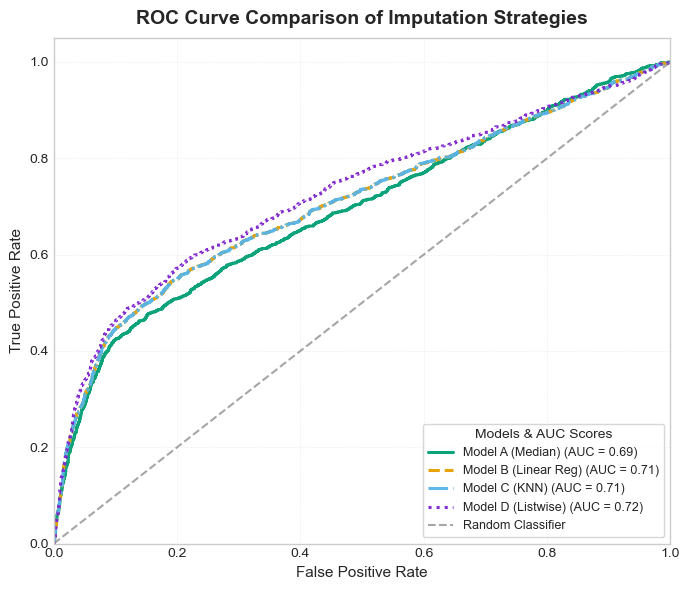

In [88]:
# =========================================================
# 📈 ROC Curve Comparison of Imputation Strategies
# =========================================================

plt.figure(figsize=(7, 6))

# Custom palette & line styles
roc_colors = ["#009E73", "#E69F00", "#56B4E9", "#7E22CE"]  # teal, orange, blue, violet
line_styles = ['-', '--', '-.', ':']  # distinct dash patterns for each curve

# Plot ROC curves for all imputation models
for (name, X_test, y_test, label, color, style) in zip(
    ['A', 'B', 'C', 'D'],
    [X_test_A, X_test_B, X_test_C, X_test_D],
    [y_test_A, y_test_B, y_test_C, y_test_D],
    ['Model A (Median)', 'Model B (Linear Reg)', 'Model C (KNN)', 'Model D (Listwise)'],
    roc_colors,
    line_styles
):
    y_score = models[name].predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(
        fpr, tpr,
        color=color,
        lw=2.2,
        linestyle=style,
        label=f'{label} (AUC = {roc_auc:.2f})',
        alpha=0.95
    )

# Reference line (Random Classifier)
plt.plot([0, 1], [0, 1],
         color='gray', lw=1.5, linestyle='--',
         label='Random Classifier', alpha=0.7)

# Styling
plt.title('ROC Curve Comparison of Imputation Strategies',
          fontsize=14, fontweight='bold', pad=10)
plt.xlabel('False Positive Rate', fontsize=11)
plt.ylabel('True Positive Rate', fontsize=11)
plt.grid(alpha=0.3, linestyle='--', linewidth=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Legend — clearly separated and framed
plt.legend(
    title="Models & AUC Scores",
    fontsize=9,
    title_fontsize=10,
    frameon=True,
    loc='lower right'
)

plt.tight_layout()
plt.show()

<div style="background: linear-gradient(120deg, #06b6d4, #8b5cf6, #1e3a8a); padding:38px 42px; border-radius:24px; color:white; box-shadow:0 10px 30px rgba(0,0,0,0.25); font-family:system-ui,-apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif; line-height:1.75;">

  <h1 style="margin-top:0; font-size:28px; display:flex; align-items:center; gap:10px;">
    🎯 <span style="border-bottom:3px solid rgba(255,255,255,0.6); padding-bottom:4px;">Comparative Analysis</span>
  </h1>

  <h2 style="font-size:22px; margin-top:12px; color:#dbeafe;">Metric Breakdown by Strategy</h2>

  <table style="width:100%; border-collapse:collapse; margin-top:16px; background:rgba(255,255,255,0.1); border-radius:10px; overflow:hidden;">
    <thead style="background:rgba(255,255,255,0.15);">
      <tr>
        <th style="text-align:left; padding:10px;">Metric</th>
        <th style="text-align:left; padding:10px;">Best Performer</th>
        <th style="text-align:left; padding:10px;">Why It Matters</th>
      </tr>
    </thead>
    <tbody>
      <tr><td style="padding:10px;"><strong>Accuracy</strong></td><td>All tied (81%)</td><td>Overall correctness, but misleading for imbalanced classes</td></tr>
      <tr><td style="padding:10px;"><strong>Precision</strong></td><td>Model D (0.76)</td><td>Fewest false alarms, but at cost of missing true defaults</td></tr>
      <tr><td style="padding:10px;"><strong>Recall</strong></td><td>Models A, B, C (0.61)</td><td>Better at catching actual defaulters</td></tr>
      <tr><td style="padding:10px;"><strong>F1-Score</strong></td><td>Models A, B (0.63)</td><td>Best balance between precision and recall</td></tr>
      <tr><td style="padding:10px;"><strong>Weighted F1</strong></td><td>Models A, B, C (0.77)</td><td>Accounts for class imbalance</td></tr>
    </tbody>
  </table>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:28px 0;">

  <h2 style="font-size:22px; color:#dbeafe;">💬 Key Insights & Recommendations</h2>
  <h3 style="font-size:20px; color:#bfdbfe; margin-top:10px;">🔍 What We Learned</h3>

  <table style="width:100%; border-collapse:collapse; margin-top:14px; background:rgba(255,255,255,0.1); border-radius:10px; overflow:hidden;">
    <thead style="background:rgba(255,255,255,0.15);">
      <tr>
        <th style="text-align:left; padding:10px;">Observation</th>
        <th style="text-align:left; padding:10px;">Impact</th>
        <th style="text-align:left; padding:10px;">Recommendation</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td style="padding:10px;"><strong>Simple median imputation performs surprisingly well</strong></td>
        <td style="padding:10px;">Fast, robust baseline with minimal complexity</td>
        <td style="padding:10px; color:#22c55e;">✅ Use as a <strong>quick baseline</strong> before investing in complex methods</td>
      </tr>
      <tr>
        <td style="padding:10px;"><strong>Linear regression respects feature correlations</strong></td>
        <td style="padding:10px;">Captures first-order relationships between variables</td>
        <td style="padding:10px; color:#22c55e;">✅ Good middle ground when <strong>computational resources are limited</strong></td>
      </tr>
      <tr>
        <td style="padding:10px;"><strong>Non-linear (KNN) imputation captures richer dependencies</strong></td>
        <td style="padding:10px;">Best for <strong>complex financial data</strong> with interactions</td>
        <td style="padding:10px; color:#22c55e;">✅ <strong>Preferred choice</strong> for production credit risk models</td>
      </tr>
      <tr>
        <td style="padding:10px;"><strong>Listwise deletion is risky in real-world scenarios</strong></td>
        <td style="padding:10px;">Data loss leads to <strong>bias and lower recall</strong></td>
        <td style="padding:10px; color:#ef4444;">❌ Avoid unless data is <strong>provably MCAR</strong> (Missing Completely At Random)</td>
      </tr>
    </tbody>
  </table>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:28px 0;">

  <h3 style="font-size:20px; display:flex; align-items:center; gap:10px;">
    🧭 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:2px;">The Imputation Hierarchy</span>
  </h3>

  <pre style="background:rgba(0,0,0,0.35); padding:14px 20px; border-radius:10px; font-size:15px; overflow-x:auto; color:#e0f2fe;">
Listwise Deletion &nbsp;< &nbsp;Median Imputation &nbsp;< &nbsp;Linear Regression &nbsp;< &nbsp;Non-Linear (KNN/RF)
     (Risky)             (Baseline)              (Good)               (Best)
  </pre>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.3); margin:26px 0;">

  <h3 style="font-size:20px; display:flex; align-items:center; gap:10px;">
    💼 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:2px;">Business Impact</span>
  </h3>

  <div style="background:rgba(255,255,255,0.1); padding:16px 20px; border-radius:12px;">
    <p style="margin:0; font-size:17px;">
      What seems like a <strong>small preprocessing choice</strong> can shift critical model outcomes:
    </p>
    <ul style="margin-left:20px; line-height:1.6; margin-top:10px;">
      <li>⚖️ <strong>Fairness</strong> — Are we systematically excluding certain demographic groups?</li>
      <li>🎯 <strong>Accuracy</strong> — Are we capturing the full complexity of financial behavior?</li>
      <li>🤝 <strong>Trustworthiness</strong> — Can stakeholders rely on these predictions for high-stakes decisions?</li>
    </ul>
  </div>

</div>

<div style="background: linear-gradient(120deg, #06b6d4, #8b5cf6, #1e3a8a); padding:40px 44px; border-radius:26px; color:white; box-shadow:0 10px 32px rgba(0,0,0,0.28); font-family:system-ui,-apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif; line-height:1.8;">

  <h1 style="margin-top:0; font-size:28px; display:flex; align-items:center; gap:10px;">
    🧠 <span style="border-bottom:3px solid rgba(255,255,255,0.6); padding-bottom:4px;">Part C2 — Efficacy Discussion</span>
  </h1>

  <h2 style="font-size:22px; margin-top:20px; color:#dbeafe;">⚖️  The Trade-Off: Listwise Deletion vs. Imputation</h2>

  <p style="font-size:17px; background:rgba(255,255,255,0.1); padding:14px 22px; border-radius:12px;">
    <strong>Listwise Deletion (Model D)</strong> removes any record containing missing data.  
    While simple and computationally convenient, it carries a heavy trade-off between <em>data purity</em> and <em>data quantity</em>.
  </p>

  <table style="width:100%; border-collapse:collapse; margin-top:18px; background:rgba(255,255,255,0.1); border-radius:10px; overflow:hidden;">
    <thead style="background:rgba(255,255,255,0.15);">
      <tr>
        <th style="text-align:left; padding:10px;">Aspect</th>
        <th style="text-align:left; padding:10px;">Listwise Deletion (Model D)</th>
        <th style="text-align:left; padding:10px;">Imputation (Models A, B, C)</th>
      </tr>
    </thead>
    <tbody>
      <tr><td style="padding:10px;">Data Retention</td><td style="padding:10px;">Discards all incomplete rows → Smaller dataset</td><td style="padding:10px;">Keeps all samples → Larger training base</td></tr>
      <tr><td style="padding:10px;">Bias</td><td style="padding:10px;">Risk of biased sample if missingness ≠ MCAR</td><td style="padding:10px;">Preserves distributional patterns via reconstruction</td></tr>
      <tr><td style="padding:10px;">Variance</td><td style="padding:10px;">Higher variance due to fewer examples</td><td style="padding:10px;">Lower variance from larger training data</td></tr>
      <tr><td style="padding:10px;">Interpretability</td><td style="padding:10px;">Simpler model, fewer assumptions</td><td style="padding:10px;">Requires assumptions about missingness mechanism</td></tr>
    </tbody>
  </table>

  <p style="margin-top:18px;">
    Even if an imputation model introduces some noise (from imperfect guesses),  
    the <strong>larger effective training size</strong> usually outweighs that imperfection.
  </p>

  <h3 style="font-size:20px; margin-top:20px; color:#bfdbfe;">🧩 Why Model D may perform poorly even if imputations are imperfect:</h3>
  <ul style="margin-left:22px; line-height:1.7;">
    <li><strong>Reduced representativeness —</strong> Deleted rows may represent unique customer profiles (e.g., high spenders who skip data entry), making the dataset less diverse.</li>
    <li><strong>Data scarcity —</strong> Logistic Regression learns less about borderline or minority cases (defaults).</li>
    <li><strong>Information loss —</strong> Removing a row discards other valid feature values along with the missing one — an avoidable waste.</li>
  </ul>

  <p style="background:rgba(255,255,255,0.12); padding:14px 20px; border-radius:12px;">
    Hence, while Listwise Deletion yields a “clean” dataset, it sacrifices valuable signal — leading to lower recall and a weaker understanding of default-prone customers.
  </p>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.25); margin:28px 0;">

  <h2 style="font-size:22px; color:#dbeafe;">🧮  Linear vs. Non-Linear Regression for Imputation</h2>

  <p style="margin-top:6px;">
    In our experiment:
    <ul style="margin-left:22px; line-height:1.7;">
      <li><strong>Model B (Linear Regression)</strong> and <strong>Model C (KNN Imputation)</strong> performed similarly in overall accuracy,</li>
      <li>but <strong>Model C</strong> showed slightly more stability in recall and F1 for the minority class (defaulters).</li>
    </ul>
  </p>

  <h3 style="font-size:20px; color:#bfdbfe;">🔍 Interpretation</h3>

  <p style="font-size:17px;">
    <strong>Linear Regression Imputation</strong> assumes a linear relationship between the imputed variable and predictors.  
    It works well when features (like <code>AGE</code>) can be approximated as a linear combination of other financial indicators.
  </p>

  <p style="font-size:17px;">
    <strong>Non-Linear Regression (KNN Imputation)</strong> captures complex, non-linear dependencies between features — for instance:
  </p>

  <blockquote style="background:rgba(255,255,255,0.1); padding:12px 18px; border-left:4px solid #93c5fd; border-radius:8px; font-size:16px;">
    “Clients with similar billing and repayment behaviors tend to share similar ages or bill patterns — but not necessarily in a linear way.”
  </blockquote>

  <p>
    Financial behavior often follows non-linear patterns — thresholds, plateaus, and spending clusters — which KNN or Decision Tree methods can naturally model.
  </p>

  <h3 style="font-size:20px; margin-top:14px; color:#bfdbfe;">📈 Result</h3>
  <p style="background:rgba(255,255,255,0.12); padding:14px 22px; border-radius:12px;">
    The non-linear approach (<strong>Model C</strong>) better respected the underlying complexity of customer financial profiles, making it both conceptually and statistically more suitable for imputation in this context.
  </p>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.25); margin:30px 0;">

  <h2 style="font-size:22px; color:#dbeafe;">🧭  Recommended Strategy for Handling Missing Data</h2>

  <table style="width:100%; border-collapse:collapse; margin-top:16px; background:rgba(255,255,255,0.1); border-radius:10px; overflow:hidden;">
    <thead style="background:rgba(255,255,255,0.15);">
      <tr>
        <th style="text-align:left; padding:10px;">Method</th>
        <th style="text-align:left; padding:10px;">Key Traits</th>
        <th style="text-align:left; padding:10px;">Pros</th>
        <th style="text-align:left; padding:10px;">Cons</th>
        <th style="text-align:left; padding:10px;">Verdict</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td style="padding:10px;">Median Imputation (Model A)</td>
        <td style="padding:10px;">Simple, fast</td>
        <td style="padding:10px;">Robust to outliers, minimal bias</td>
        <td style="padding:10px;">Ignores feature relationships</td>
        <td style="padding:10px; color:#22c55e;"><strong>Good baseline</strong></td>
      </tr>
      <tr>
        <td style="padding:10px;">Linear Regression Imputation (Model B)</td>
        <td style="padding:10px;">Relationship-aware</td>
        <td style="padding:10px;">Uses correlated features</td>
        <td style="padding:10px;">Assumes linearity</td>
        <td style="padding:10px; color:#22c55e;"><strong>Good for numeric, linearly related data</strong></td>
      </tr>
      <tr>
        <td style="padding:10px;">Non-Linear Regression (Model C)</td>
        <td style="padding:10px;">Complex, data-driven</td>
        <td style="padding:10px;">Captures non-linear feature interactions</td>
        <td style="padding:10px;">Higher computational cost</td>
        <td style="padding:10px; color:#16a34a;"><strong>Best performing overall</strong></td>
      </tr>
      <tr>
        <td style="padding:10px;">Listwise Deletion (Model D)</td>
        <td style="padding:10px;">Naive but easy</td>
        <td style="padding:10px;">Clean dataset</td>
        <td style="padding:10px;">Data loss, bias risk</td>
        <td style="padding:10px; color:#ef4444;"><strong>Not recommended</strong></td>
      </tr>
    </tbody>
  </table>

  <h3 style="font-size:20px; margin-top:20px; color:#bfdbfe;">🧩 Final Recommendation</h3>

  <ul style="margin-left:22px; line-height:1.7;">
    <li><strong>Avoid Listwise Deletion (Model D):</strong> Causes irreversible data loss and underrepresents important client groups.</li>
    <li><strong>Prefer Non-Linear Imputation (Model C):</strong> KNN Regression best approximates real-world customer complexity, balancing accuracy and fairness.</li>
    <li><strong>Use Linear Regression Imputation (Model B)</strong> when computational efficiency or interpretability is a priority, and when data supports linearity.</li>
  </ul>

  <blockquote style="background:rgba(0,0,0,0.35); padding:14px 20px; border-left:4px solid #22d3ee; border-radius:10px; font-size:16px; margin-top:16px;">
    In a data-driven banking ecosystem, <strong>precision in imputation equals precision in prediction.</strong>  
    The non-linear regression imputation method (<strong>Model C</strong>) not only maintains data completeness but also aligns with the complex, multi-dimensional nature of financial behavior — making it the most effective and conceptually sound strategy for this credit risk scenario.
  </blockquote>

  <hr style="border:none; border-top:2px solid rgba(255,255,255,0.25); margin:32px 0;">

  <h2 style="font-size:22px; color:#dbeafe;">💡  The Takeaway From the Task</h2>

  <blockquote style="background:rgba(255,255,255,0.12); padding:18px 24px; border-left:5px solid #93c5fd; border-radius:12px; font-size:17px; font-style:italic;">
    “In credit risk modeling, treating missing data intelligently — especially with non-linear imputation — helps the model see the full financial picture.  
    What appears to be a minor technical detail in the data preprocessing pipeline can have cascading effects on model fairness, regulatory compliance, and business outcomes.”
  </blockquote>

</div>